# PROJECT : Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
#Importing libraries required for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")

In [2]:
#Loading the data with the url extracted from github
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#Shape of the dataset
df.shape

(907, 27)

In [4]:
#Checking Columns Names for verification
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#Information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
#datatype of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#Check for missing values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

I will fill the null values using fillna method

In [8]:
#Treating Null values

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [9]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

df['geolocation_source'] = df['geolocation_source'].fillna('National Renewable Energy Laboratory')



In [10]:
#Dropping columns which have more than 50% of null values
df = df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','year_of_capacity_data',
             'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 
             'generation_gwh_2017', 'generation_gwh_2018',
             'generation_gwh_2019', 'generation_data_source','estimated_generation_gwh'],axis=1)

In [11]:
#Updated df
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [12]:
df.shape

(907, 12)

In [13]:
#Dropping columns which are not relevant to our model
df = df.drop(['country', 'country_long', 'name', 'gppd_idnr','url'],axis=1)

In [14]:
#Updated Df
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI


In [15]:
df.shape

(907, 7)

In [16]:
#Again checking for missing values

df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [17]:
#Checking for summary statistics
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082
std,590.085456,6.079148,4.812291,13.016360
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,17.072000,74.388900,1997.091082
50%,59.200000,21.281800,76.979200,1997.091082
75%,385.250000,25.176450,79.206100,2003.000000
max,4760.000000,34.649000,95.408000,2018.000000


In [18]:
df.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
count,907.000000,907.000000,907.000000,907,907.000000,907,907
unique,NaN,NaN,NaN,8,NaN,191,3
top,NaN,NaN,NaN,Coal,NaN,Central Electricity Authority,WRI
freq,NaN,NaN,NaN,258,NaN,519,765
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,NaN
std,590.085456,6.079148,4.812291,NaN,13.016360,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,NaN
25%,16.725000,17.072000,74.388900,NaN,1997.091082,NaN,NaN
50%,59.200000,21.281800,76.979200,NaN,1997.091082,NaN,NaN
75%,385.250000,25.176450,79.206100,NaN,2003.000000,NaN,NaN


<AxesSubplot:>

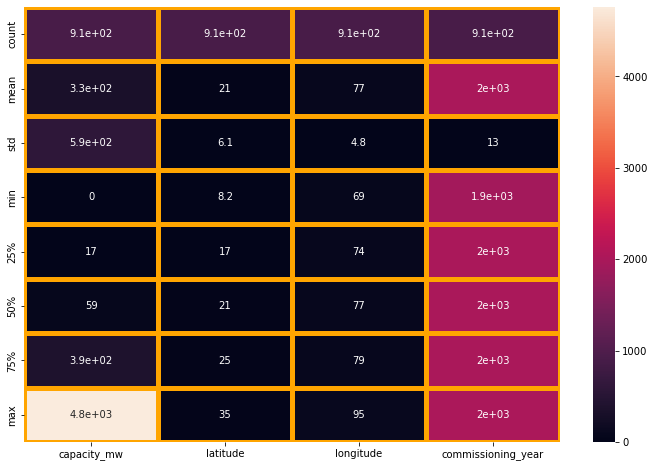

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),annot=True,linecolor='orange',linewidths=5)

# Univariate Analysis

In [20]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI


In [21]:
df.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
geolocation_source     object
dtype: object

Exploring Numerical Variables

In [22]:
numerical_variables = df.select_dtypes(include=['float64'])
numerical_variables

,capacity_mw,latitude,longitude,commissioning_year
0,2.5,28.1839,73.2407,2011.000000
1,98.0,24.7663,74.6090,1997.091082
2,39.2,21.9038,69.3732,1997.091082
3,135.0,23.8712,91.3602,2004.000000
4,1800.0,21.9603,82.4091,2015.000000
...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000
903,3.0,12.8932,78.1654,1997.091082
904,25.5,15.2758,75.5811,1997.091082
905,80.0,24.3500,73.7477,1997.091082


1}Dist Plot

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

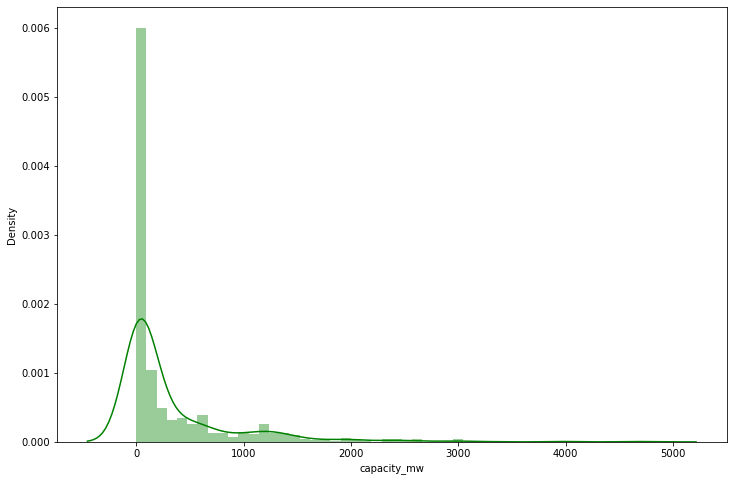

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['capacity_mw'],color='green')

<AxesSubplot:xlabel='latitude', ylabel='Density'>

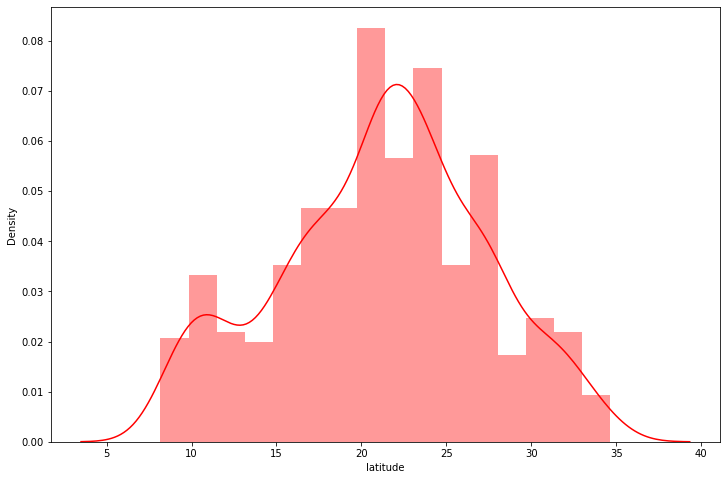

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['latitude'],color='red')

<AxesSubplot:xlabel='longitude', ylabel='Density'>

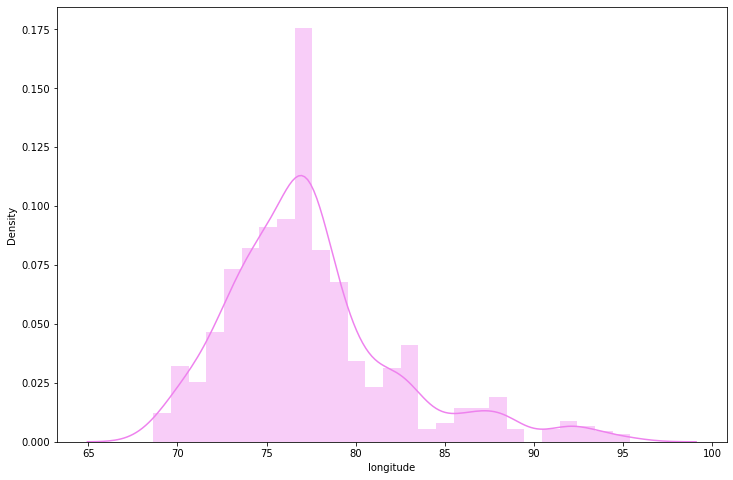

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['longitude'],color='violet')

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

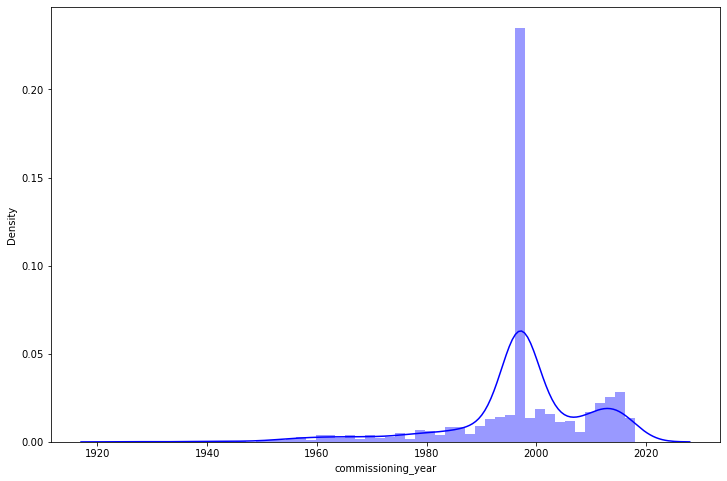

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['commissioning_year'],color='blue')

2}Violin Plot

<AxesSubplot:xlabel='latitude'>

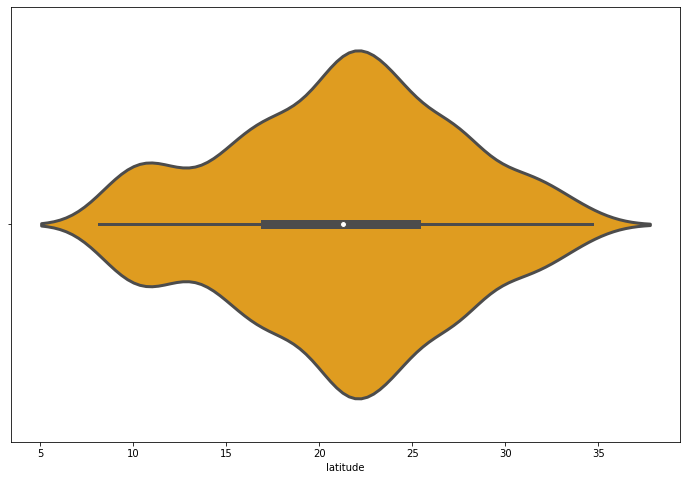

In [27]:
#latitude
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['latitude'],color='orange',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='longitude'>

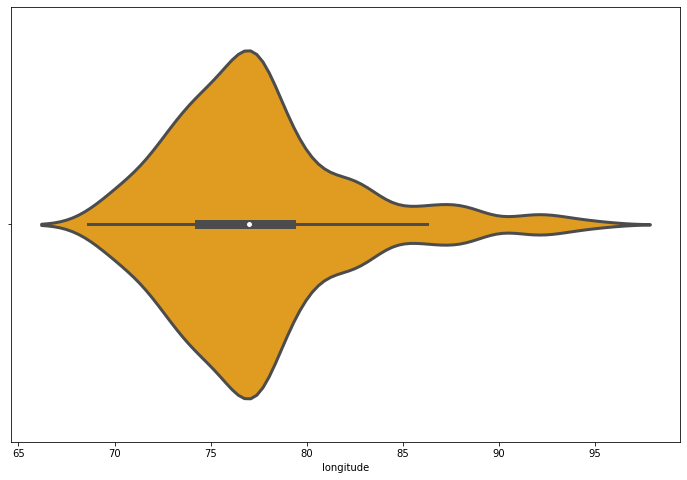

In [28]:
#longitude
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['longitude'],color='orange',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='capacity_mw'>

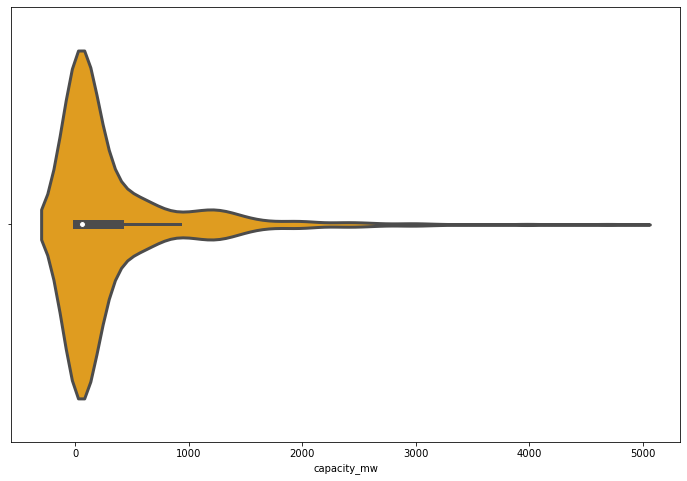

In [29]:
#capacity_mw
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['capacity_mw'],color='orange',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='commissioning_year'>

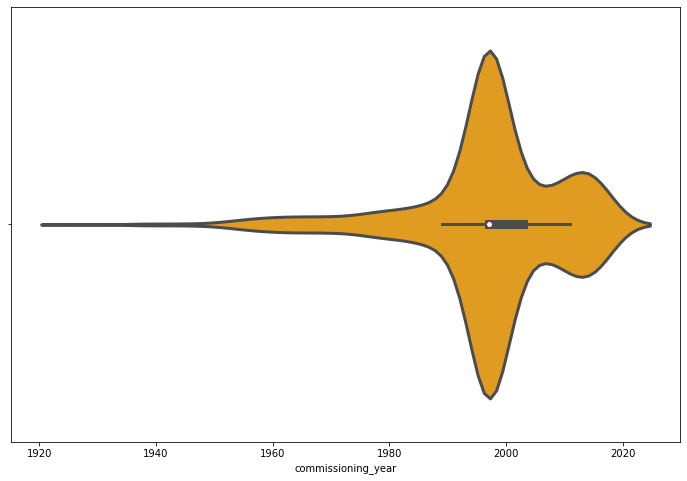

In [30]:
#commissioning_year
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['commissioning_year'],color='orange',edgecolor='black',linewidth=3)

3}Histogram

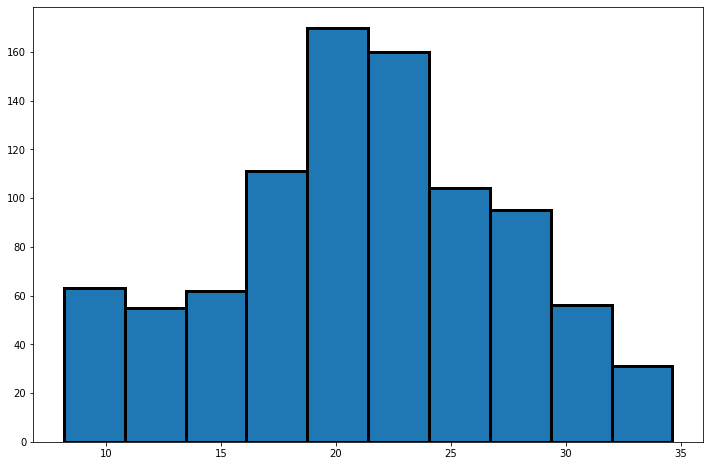

In [31]:
#Latitude
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['latitude'],edgecolor='black',linewidth=3)
plt.show()

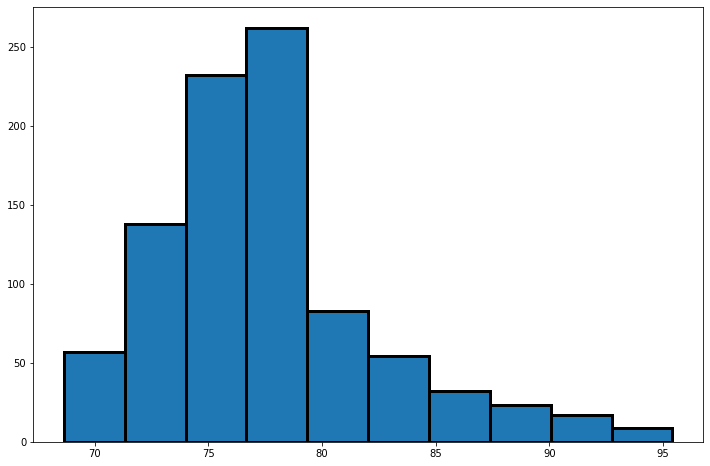

In [32]:
#Longitude
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['longitude'],edgecolor='black',linewidth=3)
plt.show()

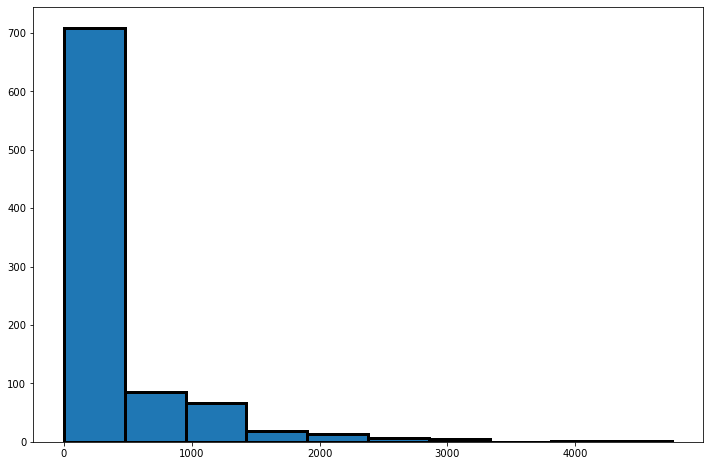

In [33]:
#Capacity_mw
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['capacity_mw'],edgecolor='black',linewidth=3)
plt.show()

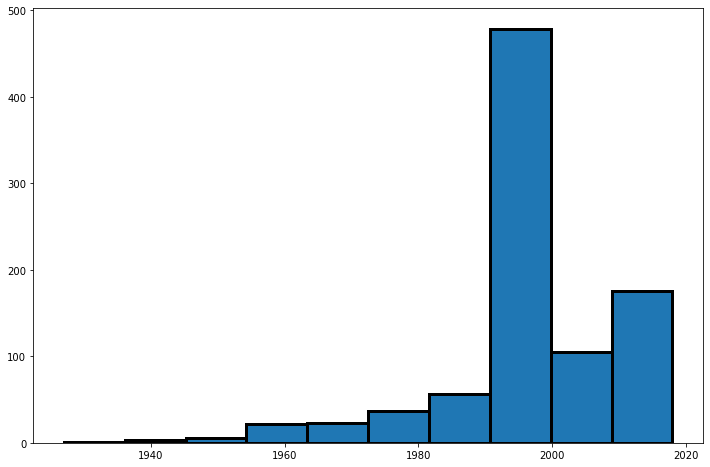

In [34]:
#commissioning_year
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['commissioning_year'],edgecolor='black',linewidth=3)
plt.show()

Exploring Categorical Variables

In [35]:
cat_var = df.select_dtypes(include=['O'])
cat_var

,primary_fuel,source,geolocation_source
0,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Ultratech Cement ltd,WRI
2,Wind,CDM,WRI
3,Gas,Central Electricity Authority,WRI
4,Coal,Central Electricity Authority,WRI
...,...,...,...
902,Coal,Central Electricity Authority,WRI
903,Solar,Karnataka Power Corporation Limited,Industry About
904,Wind,CDM,WRI
905,Coal,Hindustan Zinc ltd,WRI


In [36]:
for col in cat_var:
    c=df[col].value_counts()
    print(c)
    print('-'*100)

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
----------------------------------------------------------------------------------------------------
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: sou

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

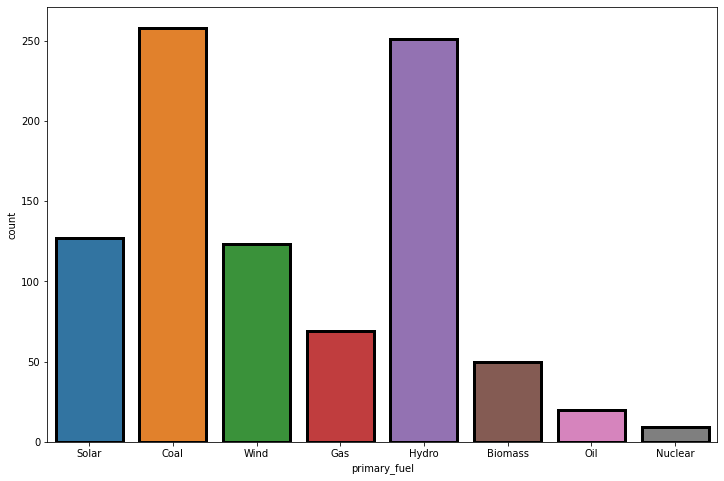

In [37]:
#Primary_fuel
plt.figure(figsize=(12,8))
sns.countplot(cat_var['primary_fuel'],edgecolor='black',linewidth=3)

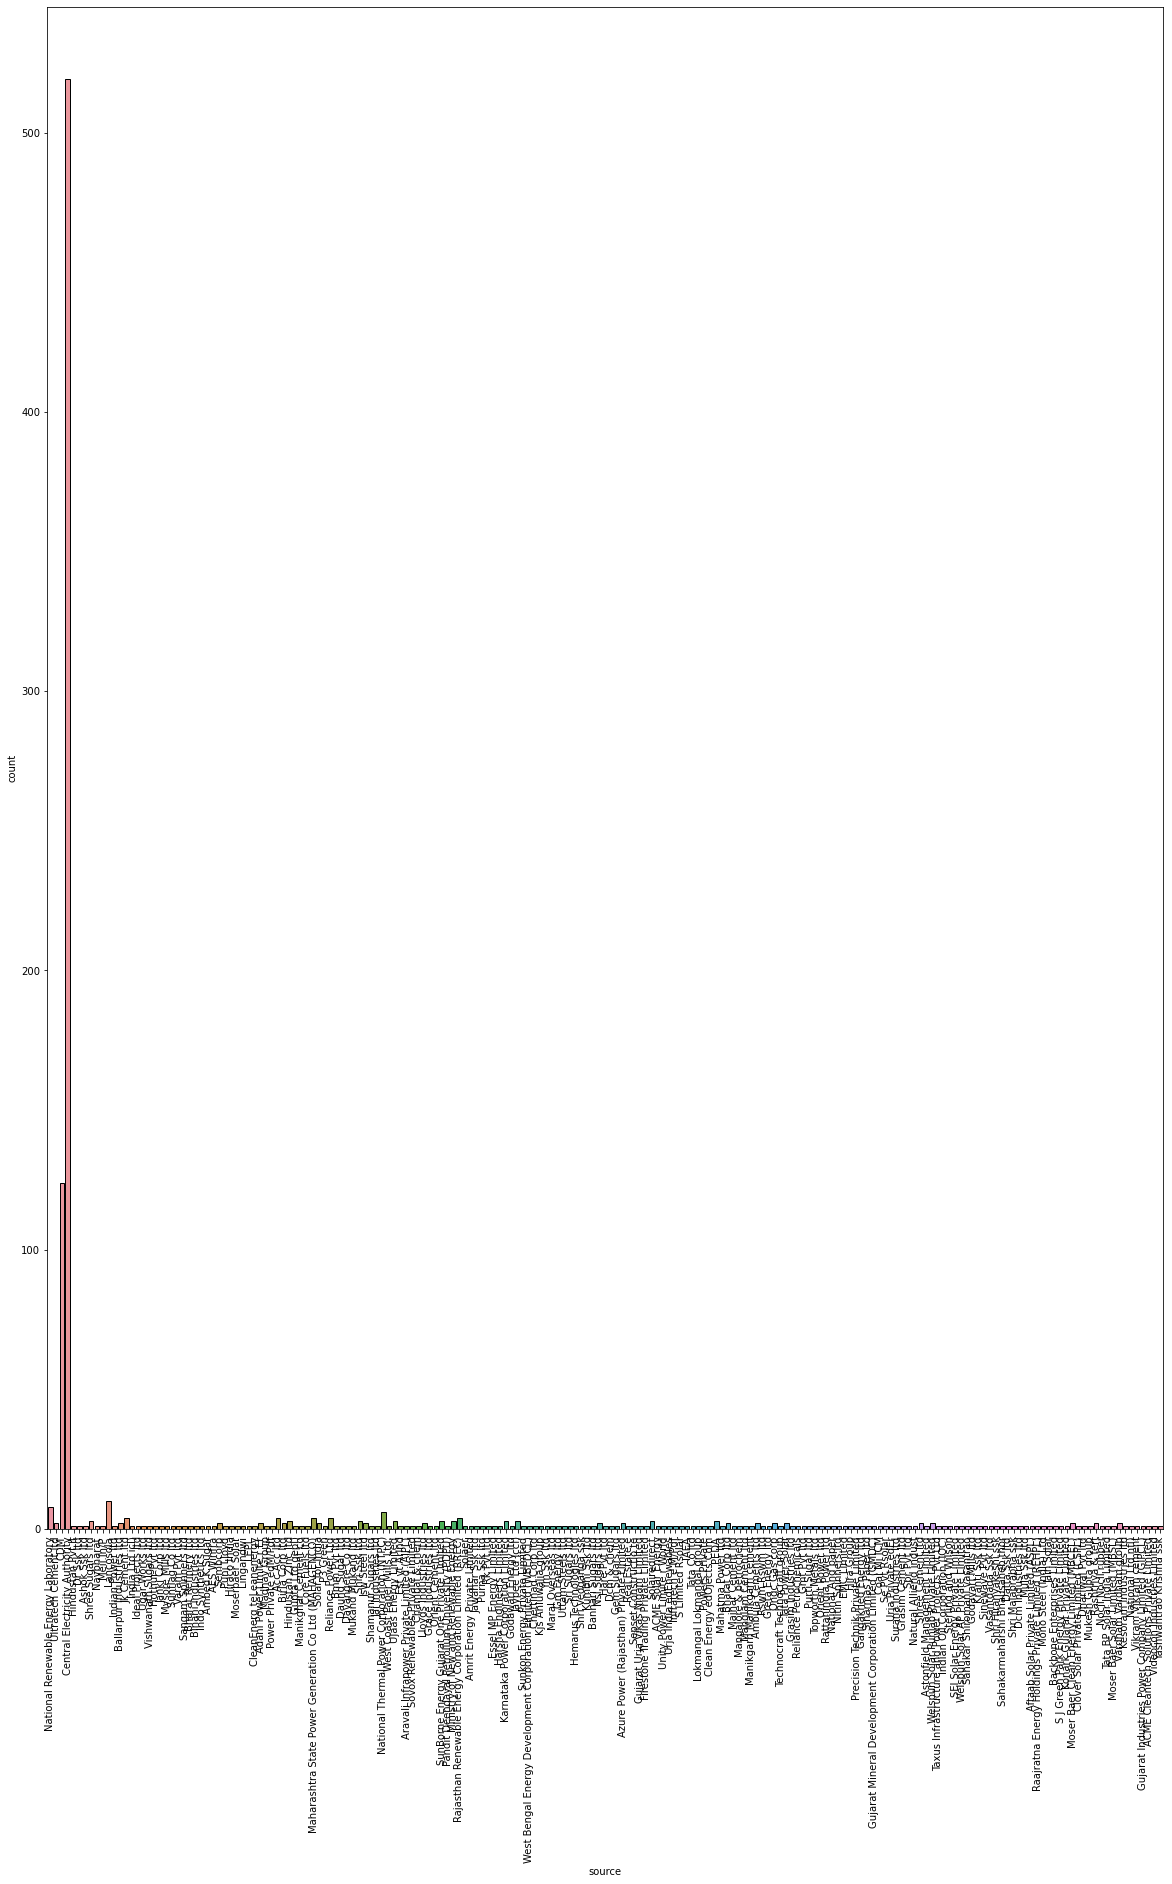

In [38]:
#Source
plt.figure(figsize=(20,28))
sns.countplot(cat_var['source'],edgecolor='black',linewidth=1)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

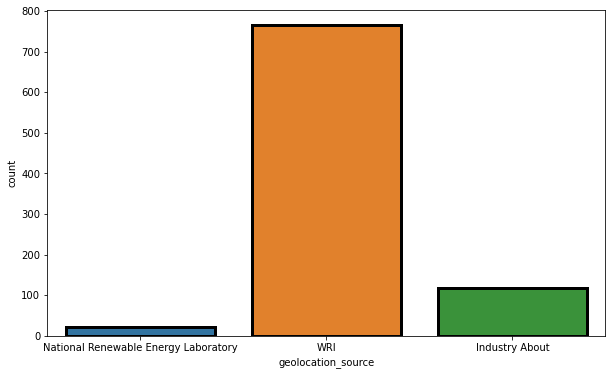

In [39]:
#Geolocation_source
plt.figure(figsize=(10,6))
sns.countplot(cat_var['geolocation_source'],edgecolor='black',linewidth=3)

# Bivariate Analysis

Our target variable is Primary Fuel i.e its a multiclassfication problem.I will compare feature variables with the target to check the distribution of the data

1]Bar Plot

In [40]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI


Souce

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

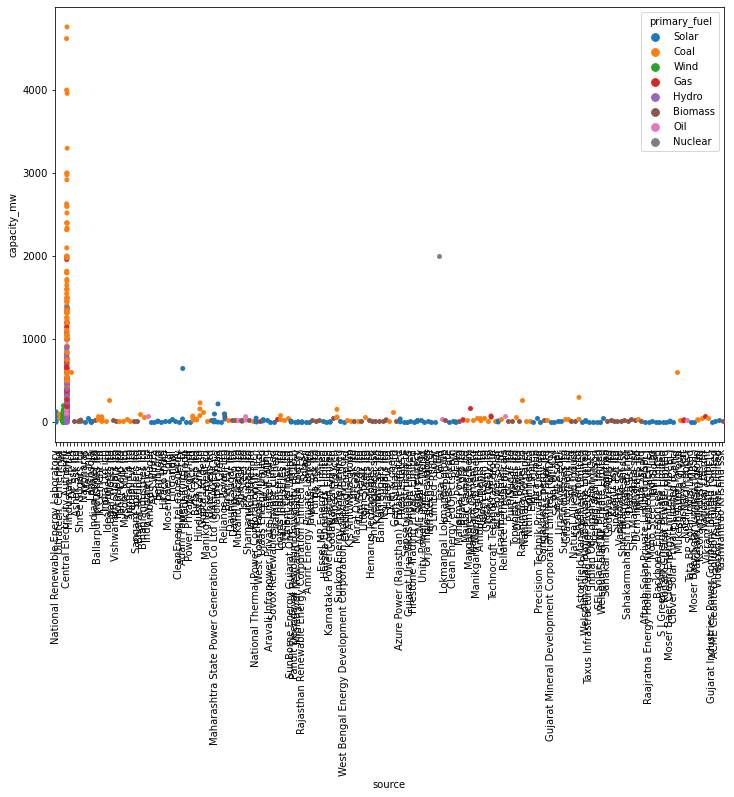

In [41]:
plt.figure(figsize=(12,8))
sns.stripplot(df['source'],df['capacity_mw'],hue=df['primary_fuel'])
plt.xticks(rotation=90)

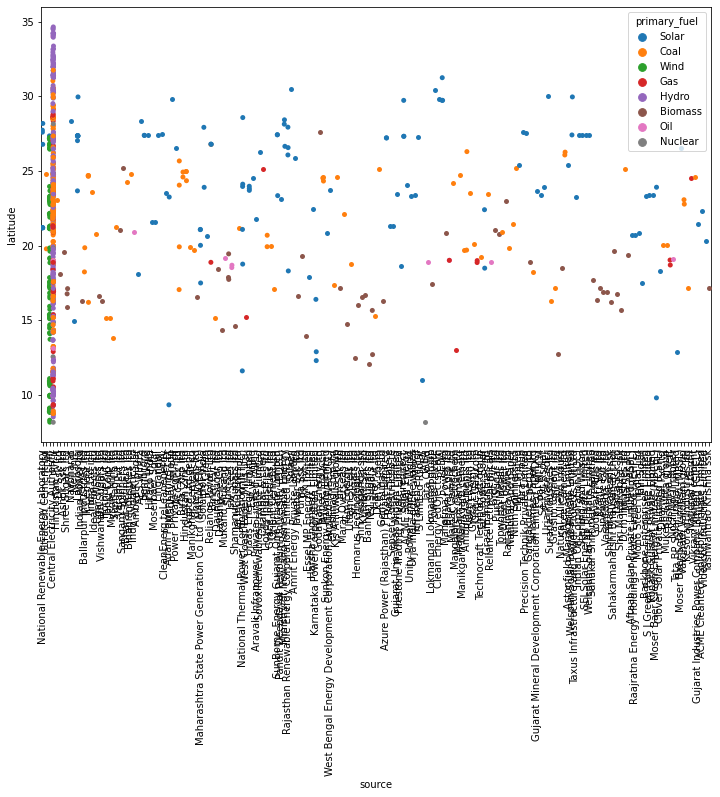

In [42]:
plt.figure(figsize=(12,8))
sns.stripplot(df['source'],df['latitude'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.show()

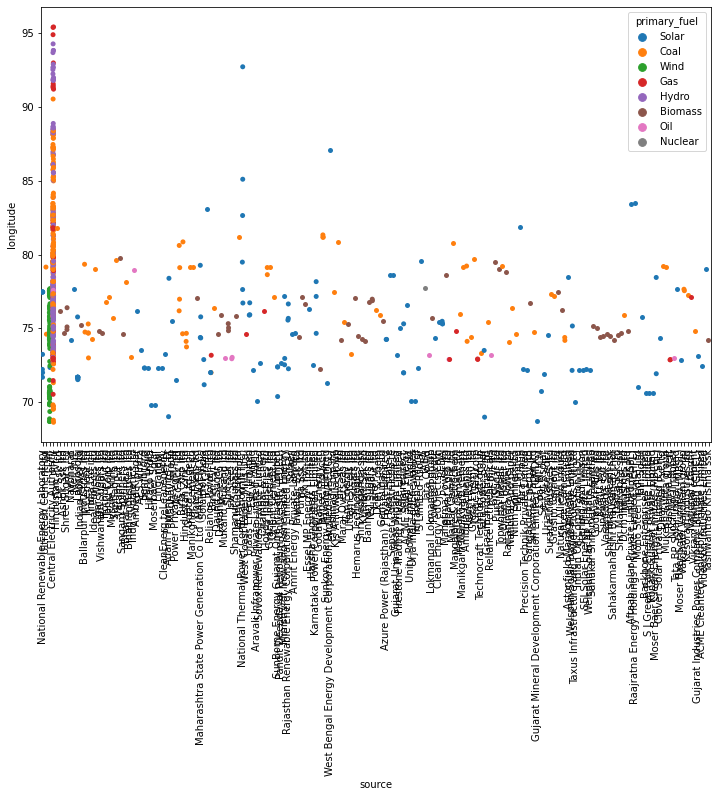

In [43]:
plt.figure(figsize=(12,8))
sns.stripplot(df['source'],df['longitude'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.show()

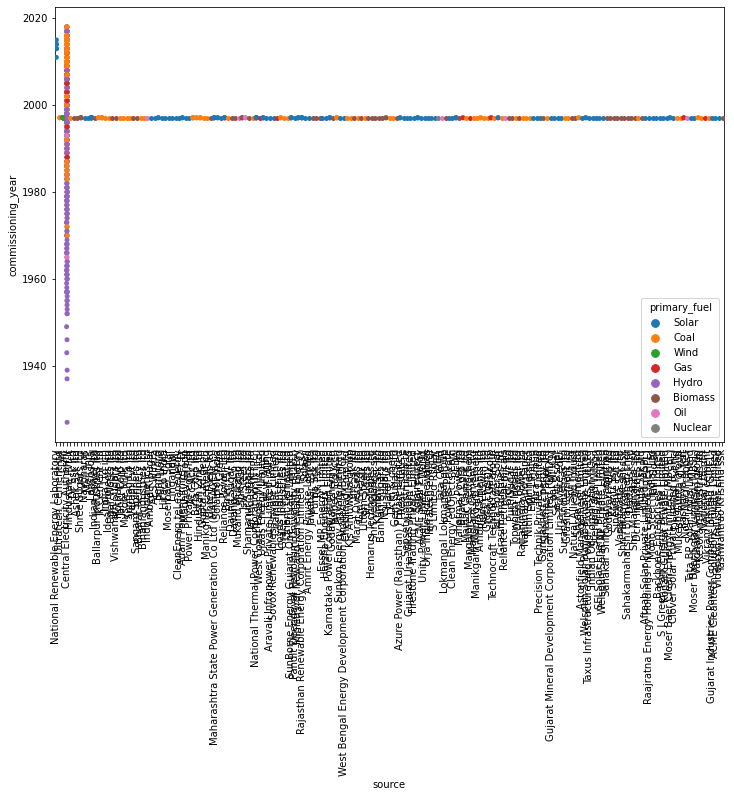

In [44]:
plt.figure(figsize=(12,8))
sns.stripplot(df['source'],df['commissioning_year'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.show()

Geolocation_source

Text(0.5, 1.0, 'Capacity_mw vs geolocation_source')

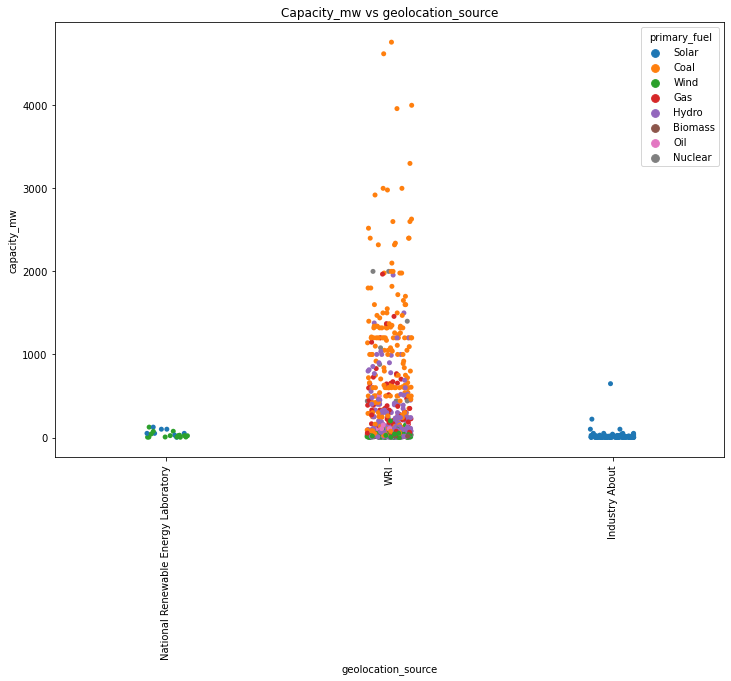

In [45]:
plt.figure(figsize=(12,8))
sns.stripplot(df['geolocation_source'],df['capacity_mw'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.title('Capacity_mw vs geolocation_source')

Text(0.5, 1.0, 'latitude vs geolocation_source')

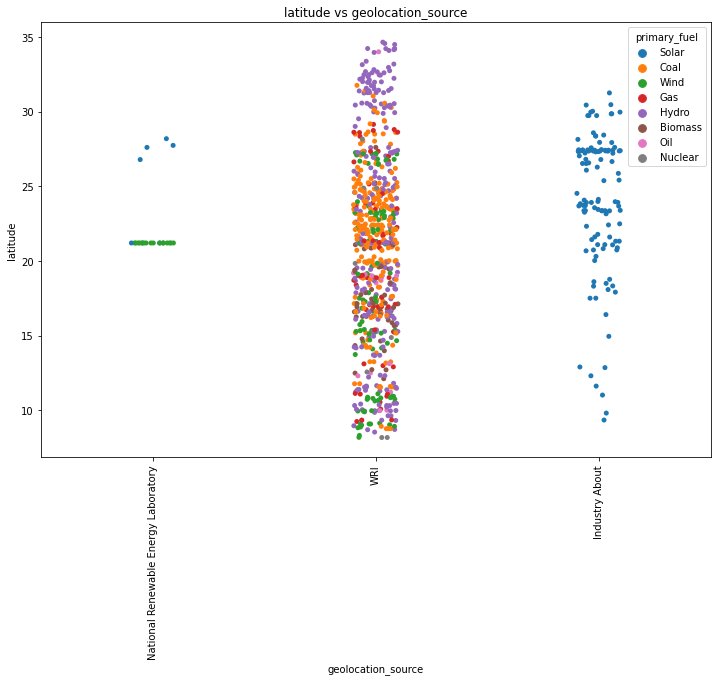

In [46]:
plt.figure(figsize=(12,8))
sns.stripplot(df['geolocation_source'],df['latitude'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.title('latitude vs geolocation_source')

Text(0.5, 1.0, 'longitude vs geolocation_source')

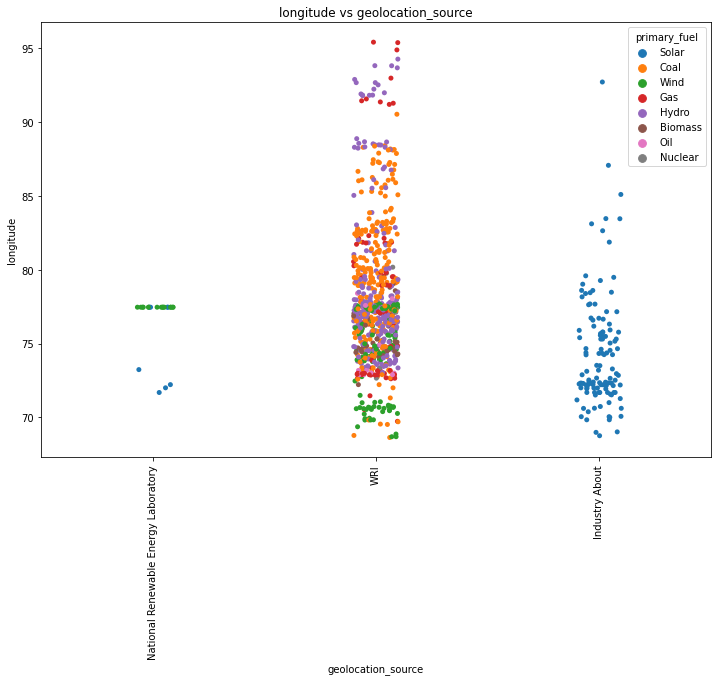

In [47]:
plt.figure(figsize=(12,8))
sns.stripplot(df['geolocation_source'],df['longitude'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.title('longitude vs geolocation_source')

Text(0.5, 1.0, 'Commissioning_year vs geolocation_source')

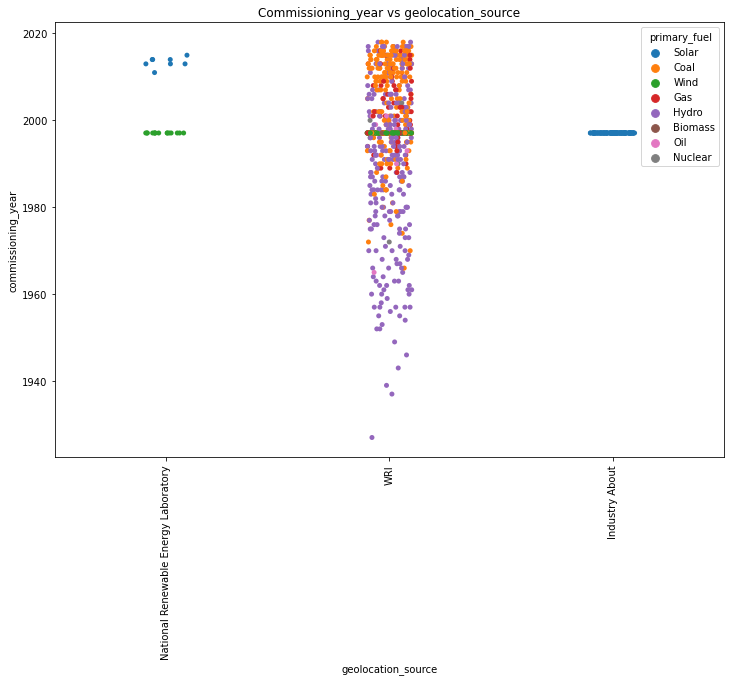

In [48]:
plt.figure(figsize=(12,8))
sns.stripplot(df['geolocation_source'],df['commissioning_year'],hue=df['primary_fuel'])
plt.xticks(rotation=90)
plt.title('Commissioning_year vs geolocation_source')

Visualizing Numerical Variables with the help of target variable

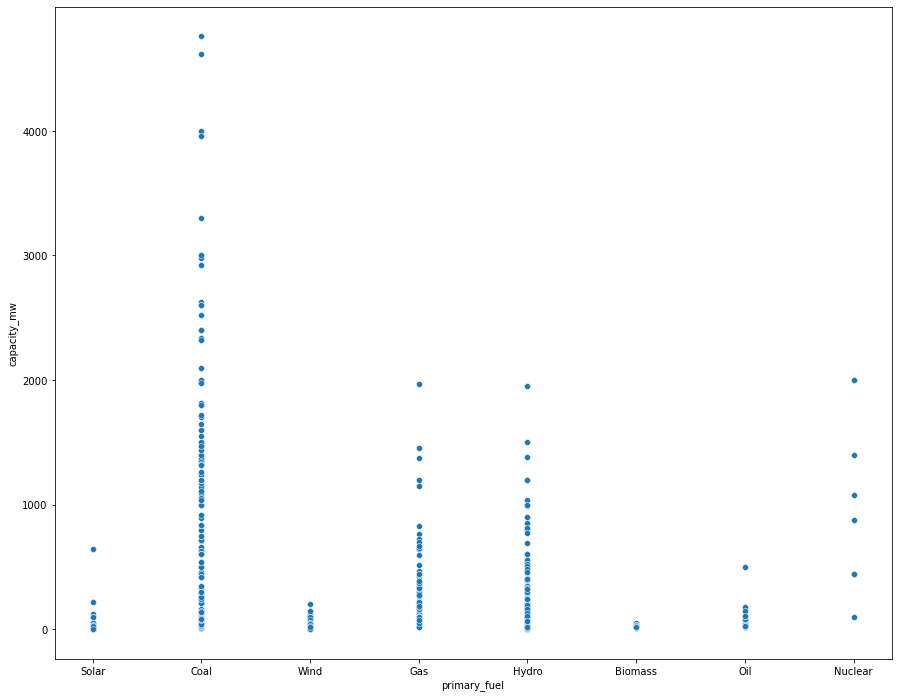

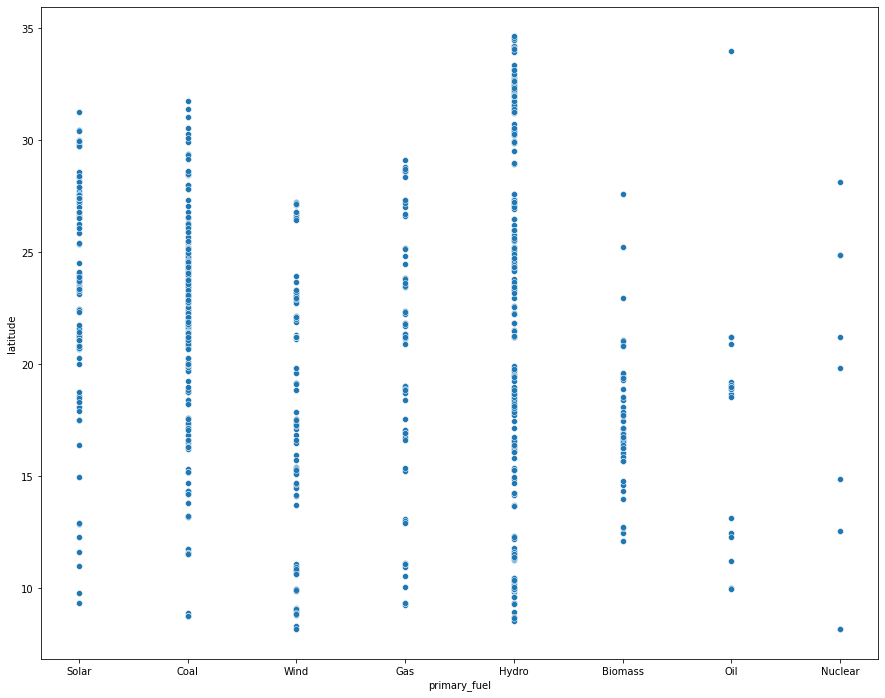

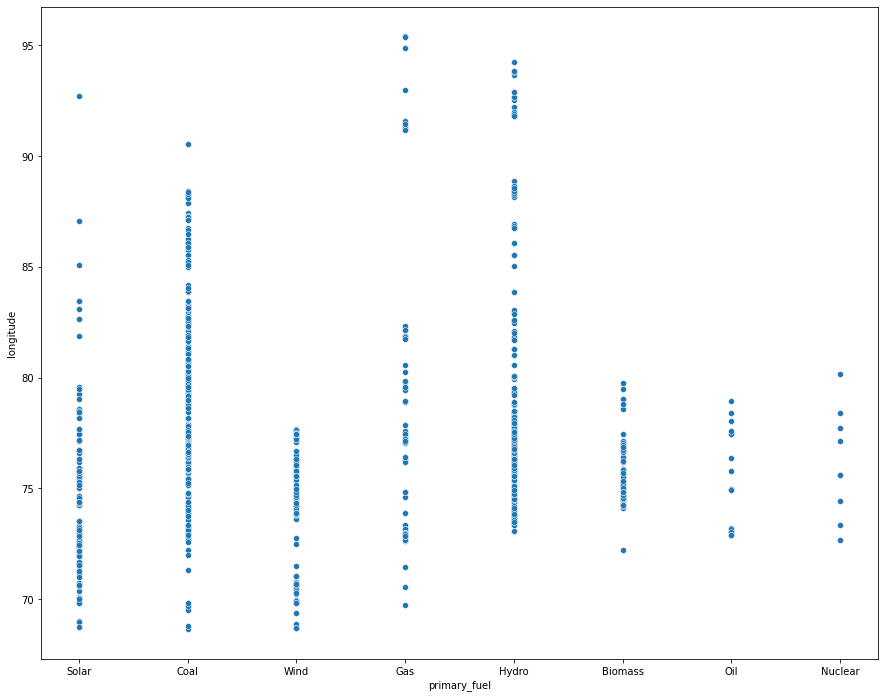

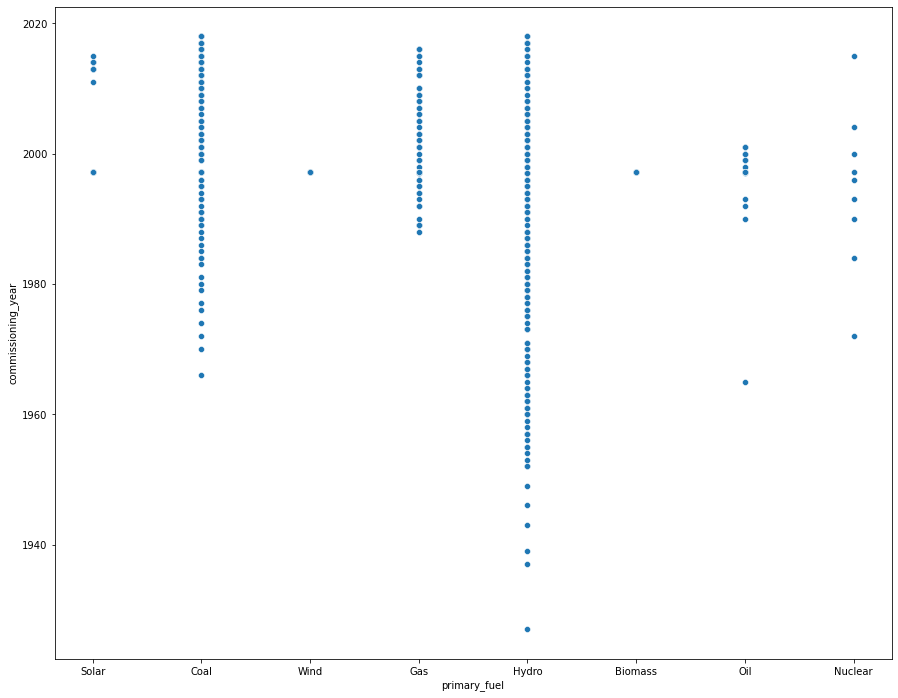

In [49]:
for i in numerical_variables:
    plt.figure(figsize=(15,12))
    sns.scatterplot(df['primary_fuel'],df[i])

Bar Plot

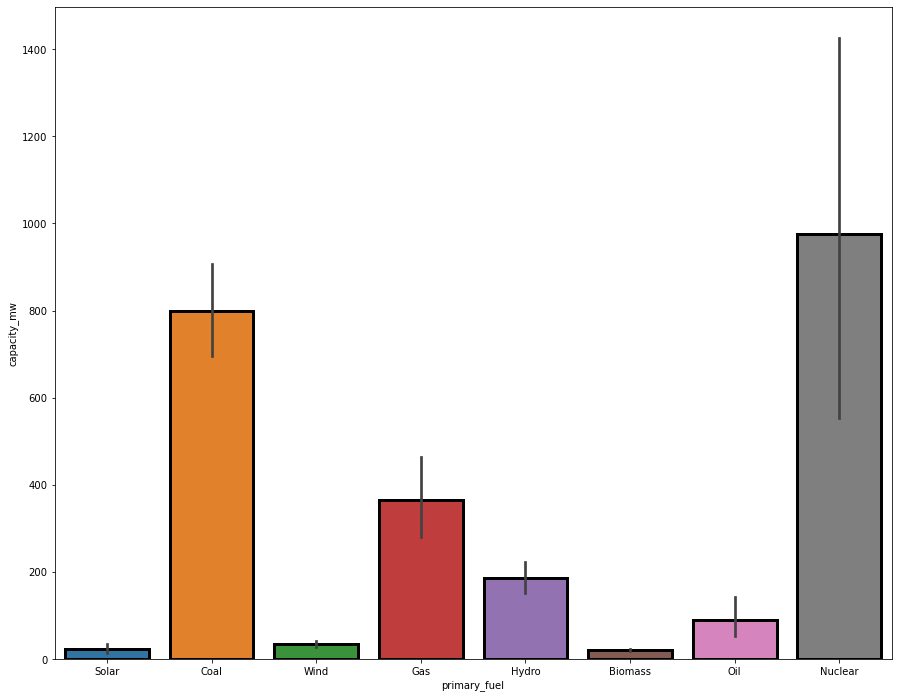

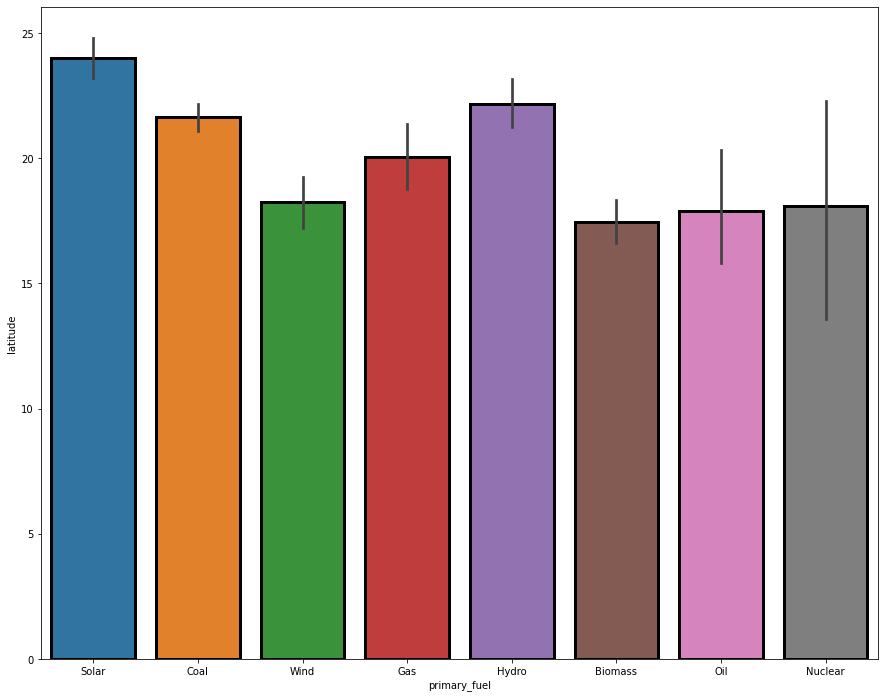

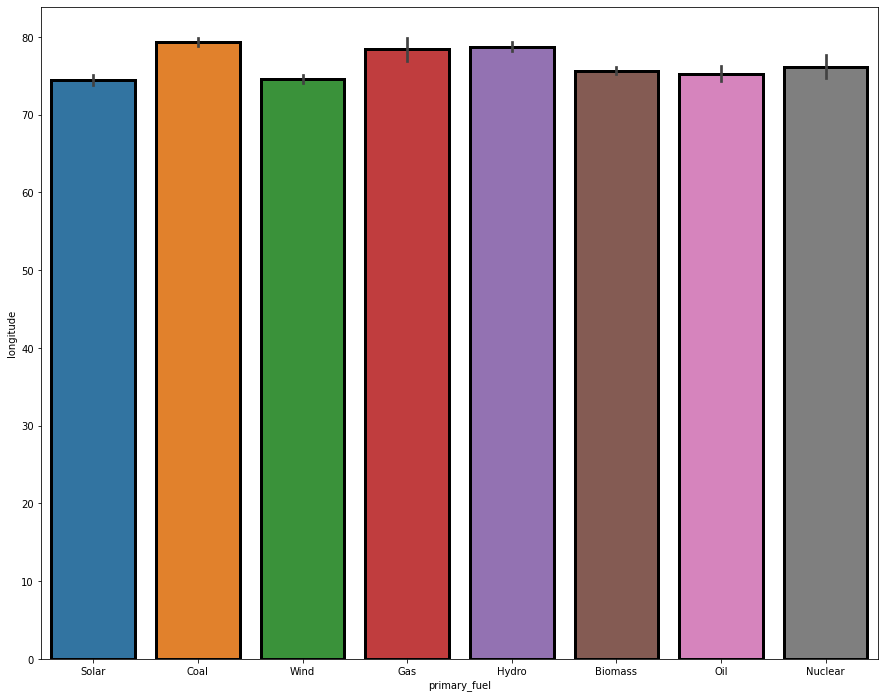

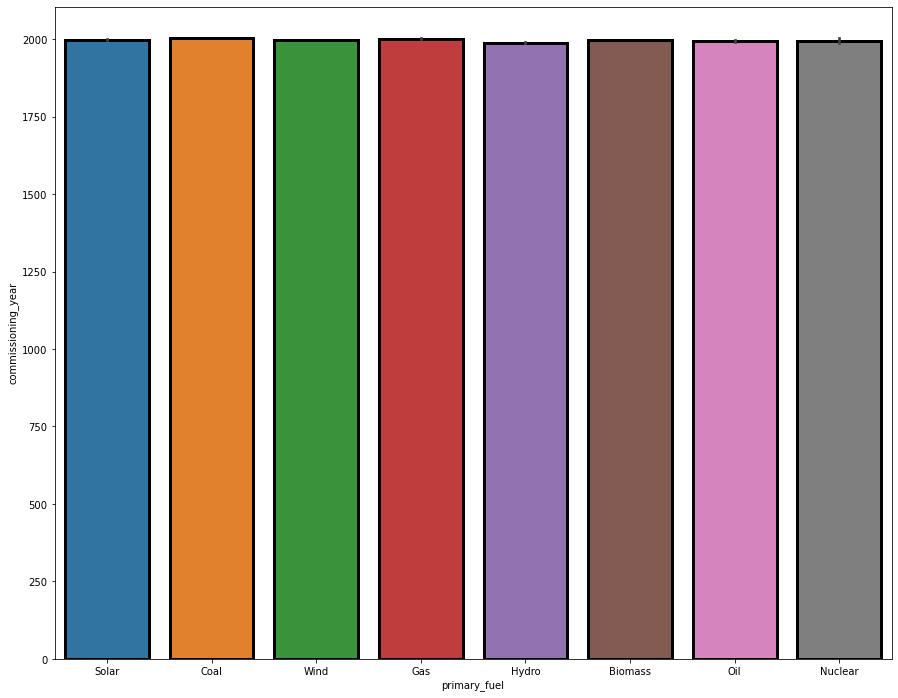

In [50]:
#BAR PLOT

for i in numerical_variables:
    plt.figure(figsize=(15,12))
    sns.barplot(df['primary_fuel'],df[i],edgecolor='black',linewidth=3)

Line Plot

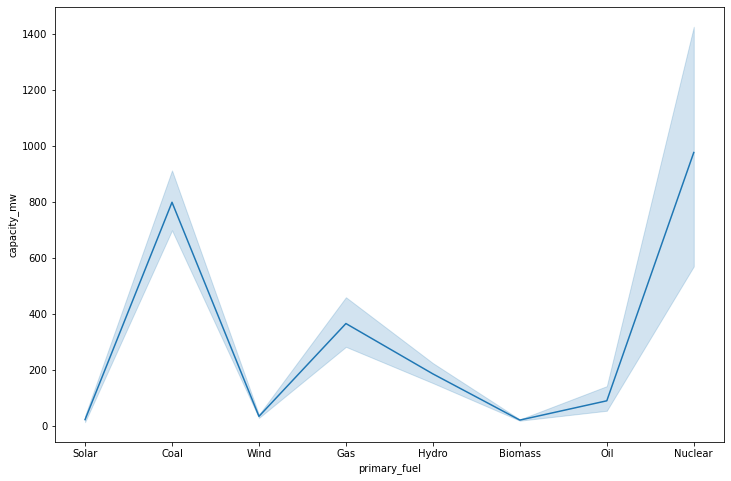

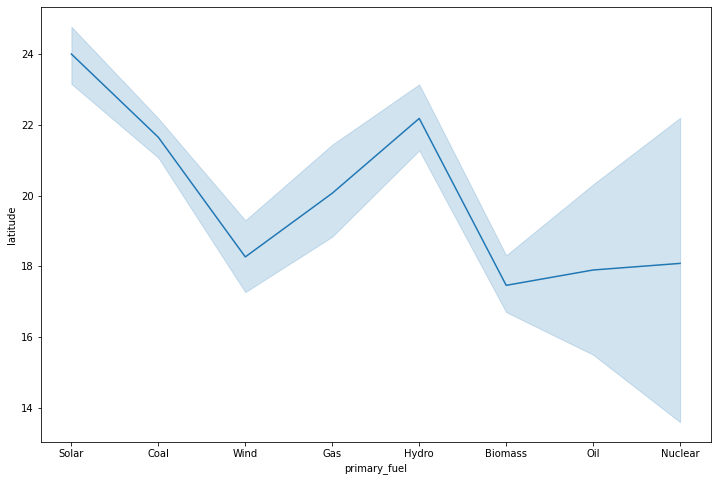

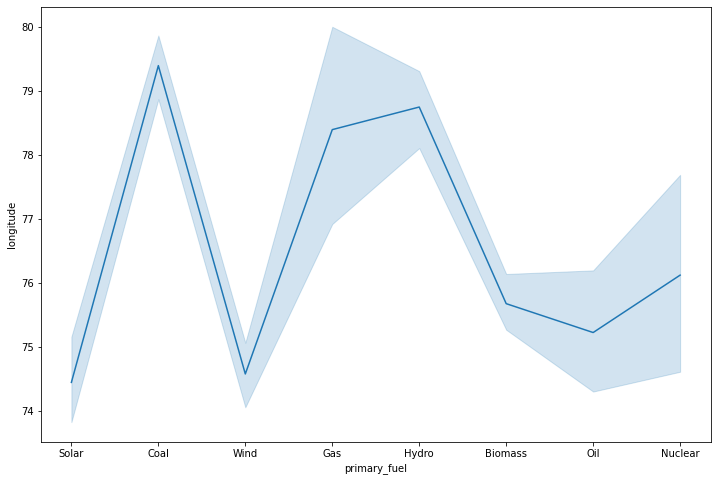

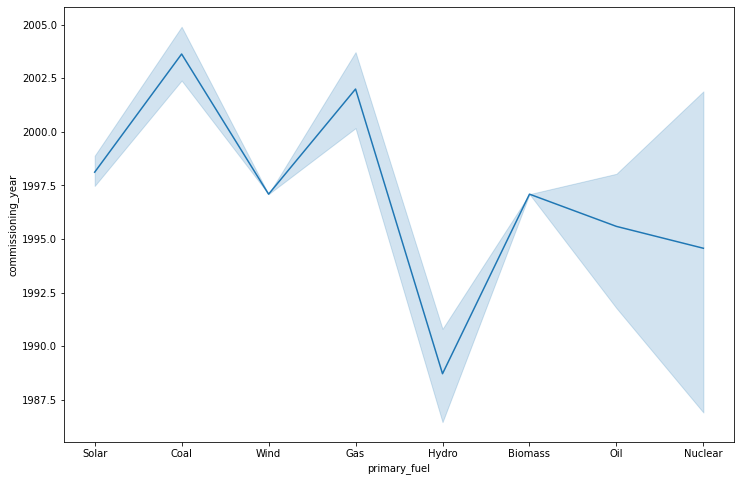

In [51]:
for i in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.lineplot(df['primary_fuel'],df[i])

Check for skewness

In [52]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
commissioning_year   -1.399359
dtype: float64

I will tune the skewness in the latter stages

Checking for outliers

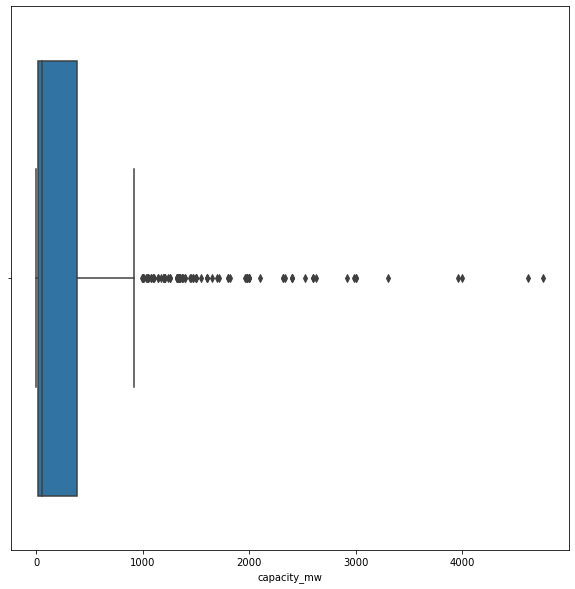

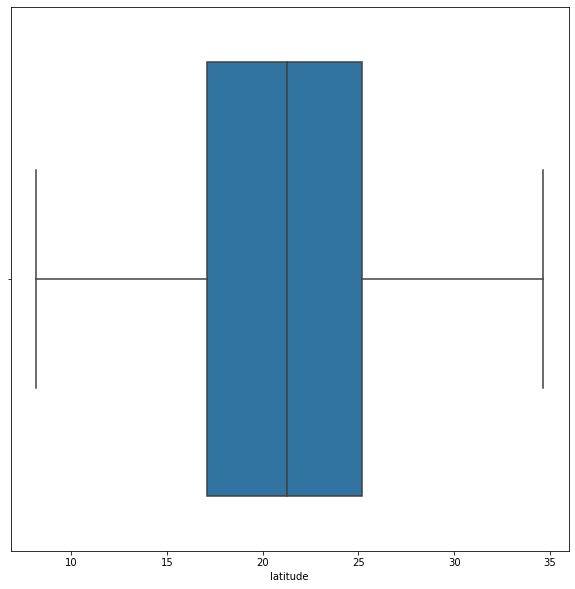

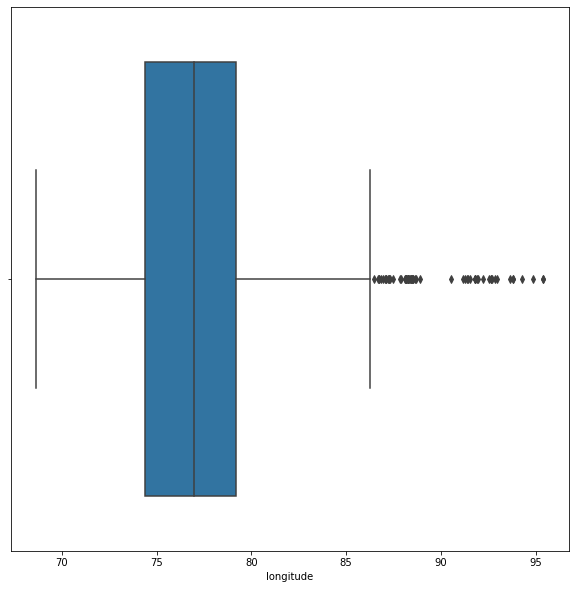

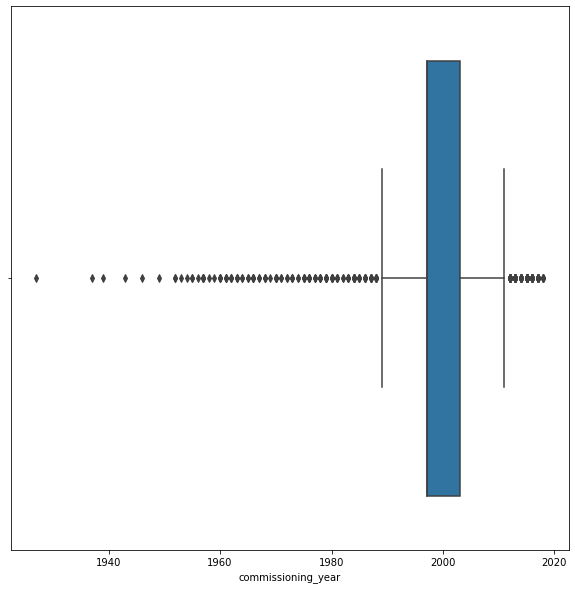

In [53]:
#Outlier Detection

for i in numerical_variables:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[i])

I will use Z score to treat outliers in the further stages

# Encoding : Converting Numerical Variable to Categorical Variable

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [55]:
cat_var.head()

,primary_fuel,source,geolocation_source
0,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Ultratech Cement ltd,WRI
2,Wind,CDM,WRI
3,Gas,Central Electricity Authority,WRI
4,Coal,Central Electricity Authority,WRI


In [56]:
cat_var.columns

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [57]:
#Encdoing Code

for feature in cat_var:
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [58]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2


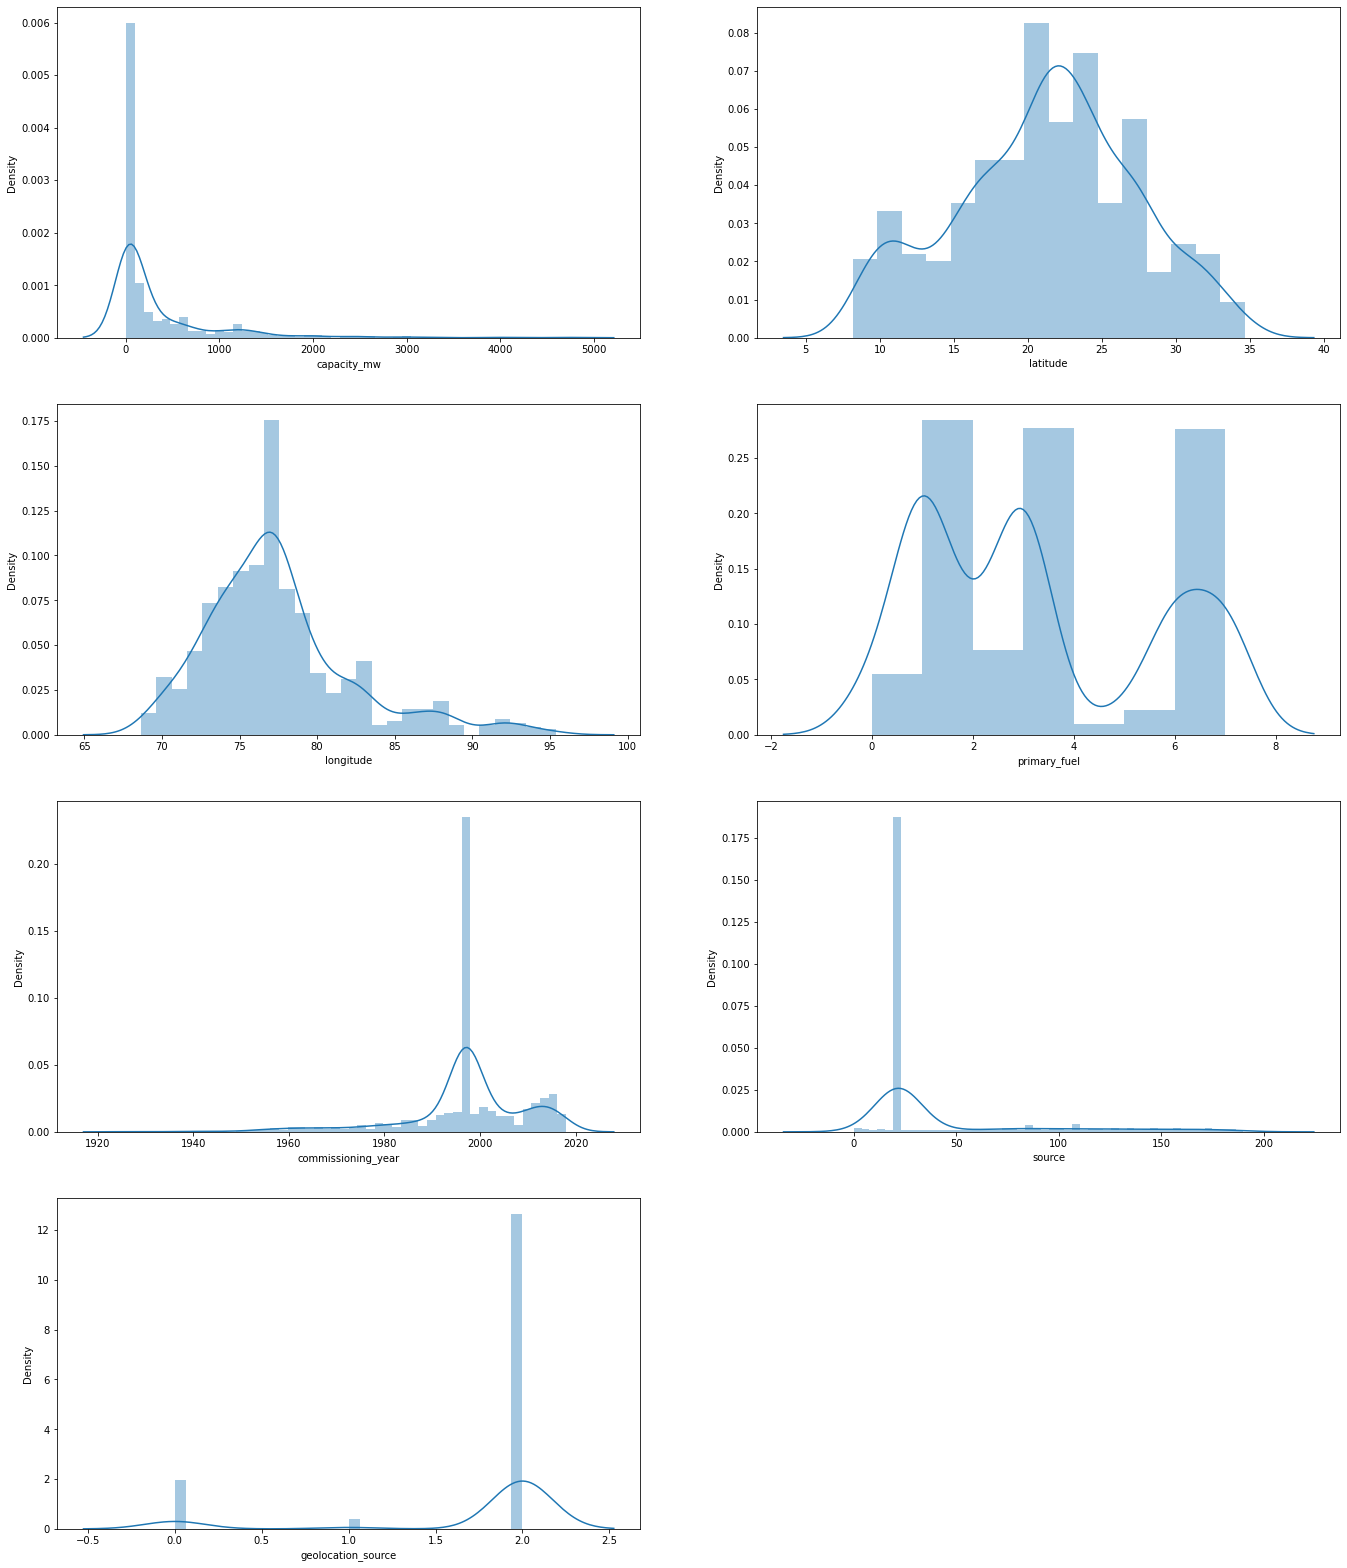

In [59]:
# Data Distribution after doing encoding

plt.figure(figsize=(23,28))
plot = 1
for i in df:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

# Correlation Matrix

In [60]:
df_corr = df.corr()

df_corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,0.217865
latitude,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.182426
longitude,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,0.249811
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,-0.526540
commissioning_year,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,-0.016150
source,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,-0.497678
geolocation_source,0.217865,-0.182426,0.249811,-0.526540,-0.016150,-0.497678,1.000000


<AxesSubplot:>

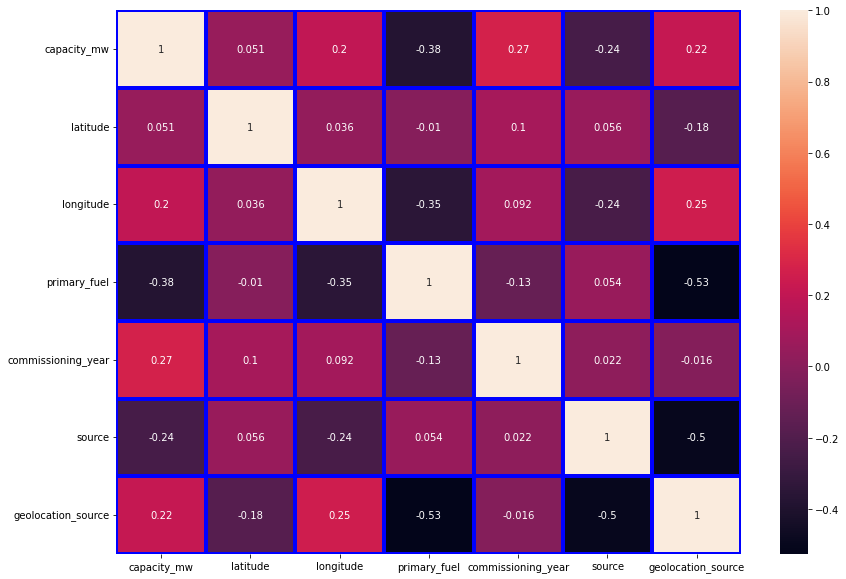

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True,linecolor='blue',linewidths=4)

# Correlation Bar Plot comparing features with our label

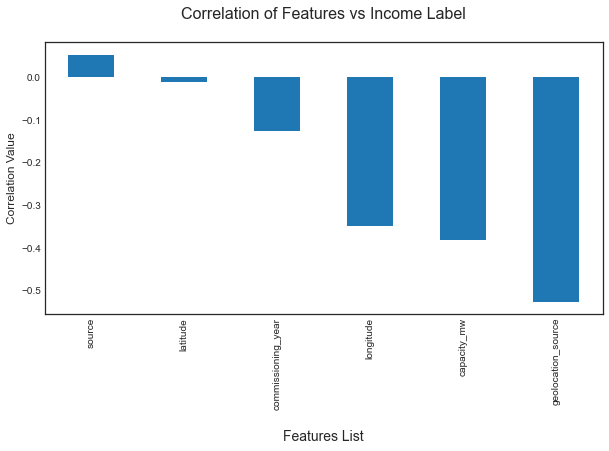

In [62]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive and negative correlation columns I have generated this bar plot and I see that columns are the only one's negatively correlated rest all the other feature columns are positively correlated with our label column.

Now I will treat the outliers

# Using Z score to treat outliers

In [63]:
from scipy.stats import zscore

In [64]:
z = np.abs(zscore(df))

z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,0.548908,1.149805,0.878280,1.225688,1.069162e+00,1.460215,1.041838
1,0.386977,0.587311,0.593788,0.967877,1.747794e-14,2.917019,0.420928
2,0.486679,0.116179,1.682394,1.664401,1.747794e-14,0.512075,0.420928
3,0.324240,0.439989,2.889052,0.529164,5.310801e-01,0.489662,0.420928
4,2.498942,0.125479,1.027976,0.967877,1.376637e+00,0.489662,0.420928
...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,1.453505e+00,0.489662,0.420928
903,0.548060,1.366853,0.145644,1.225688,1.747794e-14,0.743019,2.504604
904,0.509909,0.974707,0.391673,1.664401,1.747794e-14,0.512075,0.420928
905,0.417498,0.518793,0.772866,0.967877,1.747794e-14,0.339596,0.420928


In [65]:
#Z_Score 

threshold = 3
df1 = df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,22,2
903,3.0,12.8932,78.1654,6,1997.091082,77,0
904,25.5,15.2758,75.5811,7,1997.091082,21,2
905,80.0,24.3500,73.7477,1,1997.091082,59,2


In [66]:
print(df.shape)
print(df1.shape)

(907, 7)
(837, 7)


In [67]:
df = df1.copy()

df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,22,2
903,3.0,12.8932,78.1654,6,1997.091082,77,0
904,25.5,15.2758,75.5811,7,1997.091082,21,2
905,80.0,24.3500,73.7477,1,1997.091082,59,2


In [68]:
#Post Outlier Treatment skewness has changed slightly
df.skew()

capacity_mw           1.965229
latitude             -0.112961
longitude             0.902538
primary_fuel          0.417885
commissioning_year   -0.841353
source                1.790332
geolocation_source   -1.975392
dtype: float64

The data preprocessing for classification and regression phase has been done.I will move towards buliding my model.

# Classification Phase

Splitting the data into X and Y 

In [69]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2


In [70]:
X = df.drop(['primary_fuel'],axis=1)
Y = df['primary_fuel']

In [71]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011.000000,109,1
1,98.0,24.7663,74.6090,1997.091082,174,2
2,39.2,21.9038,69.3732,1997.091082,21,2
3,135.0,23.8712,91.3602,2004.000000,22,2
4,1800.0,21.9603,82.4091,2015.000000,22,2


In [72]:
Y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Converting Imbalanced dataset into Balanced dataset

In [73]:
Y.value_counts()

1    234
3    221
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

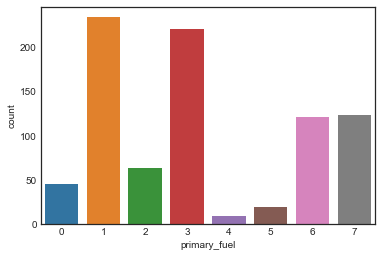

In [74]:
sns.countplot(Y)

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [77]:
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

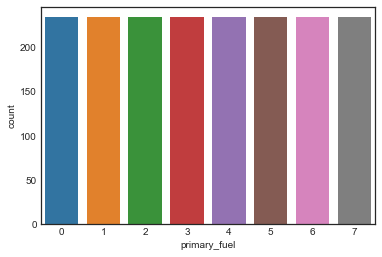

In [78]:
sns.countplot(Y)

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

# Power Transfomer


In [79]:
from sklearn.preprocessing import PowerTransformer

In [80]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(5)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.792678,1.456409,-0.899327,1.684883,1.468897,-2.318374
1,0.197977,0.878210,-0.392827,-0.141700,1.898733,0.405969
2,-0.312884,0.383023,-2.730048,-0.141700,-0.594419,0.405969
3,0.373628,0.724505,2.731540,0.709883,-0.522785,0.405969
4,1.722797,0.392903,1.579540,2.298136,-0.522785,0.405969


I have transformed the values in a normal distribution and now next I will scale the values for additional safety

# Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.792678,1.456409,-0.899371,1.684883,1.468897,-2.318374
1,0.197977,0.878210,-0.392870,-0.141700,1.898733,0.405969
2,-0.312884,0.383023,-2.730091,-0.141700,-0.594419,0.405969
3,0.373628,0.724505,2.731497,0.709883,-0.522785,0.405969
4,1.722797,0.392903,1.579497,2.298136,-0.522785,0.405969


I have scaled the values and now I will check for multicollinearity using vif method

# VIF

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.549265,capacity_mw
1,1.115129,latitude
2,1.150317,longitude
3,1.095207,commissioning_year
4,1.190457,source
5,1.494784,geolocation_source


Since variables have vif less than 10 , I can conclude that there is no multicollinearity in our feature variables.I can proceed to the model building part

# Model Building

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit,StratifiedKFold

Data

In [84]:
X_scaled

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.792678,1.456409,-0.899371,1.684883,1.468897,-2.318374
1,0.197977,0.878210,-0.392870,-0.141700,1.898733,0.405969
2,-0.312884,0.383023,-2.730091,-0.141700,-0.594419,0.405969
3,0.373628,0.724505,2.731497,0.709883,-0.522785,0.405969
4,1.722797,0.392903,1.579497,2.298136,-0.522785,0.405969
...,...,...,...,...,...,...
1867,-0.179719,-0.758232,-0.179244,-0.141700,-0.594419,0.405969
1868,-1.793676,-1.628946,0.331108,-0.141700,-0.594419,0.405969
1869,-0.483173,1.186568,-1.252958,-0.141700,-0.594419,0.405969
1870,-0.609802,0.259208,0.485177,-0.141700,-0.594419,-2.318374


In [85]:
Y

0       6
1       1
2       7
3       2
4       1
       ..
1867    7
1868    7
1869    7
1870    7
1871    7
Name: primary_fuel, Length: 1872, dtype: int32

# 1]Logistic Regression

Finding the best random state for our model

In [86]:
maxAccuracy=0
maxRandomState=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test,y_lr)*100
    
    if accuracy_lr > maxAccuracy:
        maxAccuracy = accuracy_lr
        maxRandomState = i
        
print("Best random state is ",maxRandomState,"with accuracy",accuracy_lr)

Best random state is  33 with accuracy 59.252669039145914


In [87]:
#70%Training Data and 30%Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=55)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("-----------------------------------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

print("-----------------------------------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("-----------------------------------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  65.48042704626334
-----------------------------------------------------------------------
[0.62666667 0.64533333 0.61497326 0.62566845 0.60695187]
Cross Validation Score :  0.6239187165775401
-----------------------------------------------------------------------
[[62  0  0  0  0  6  0  4]
 [ 7 27  8  5  9  2  0  2]
 [ 1 15 20  5 14  6  0  3]
 [ 0  9  5 27  7  5  0  5]
 [ 0  0  0 11 68  0  0  0]
 [17  2  1 13  4 20  0  8]
 [ 0  0  0  0  0  0 84  2]
 [ 0  0  0  3  0  7  8 60]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        72
           1       0.51      0.45      0.48        60
           2       0.59      0.31      0.41        64
           3       0.42      0.47      0.44        58
           4       0.67      0.86      0.75        79
           5       0.43      0.31      0.36        65
           6       0.91      0.98      0.94       

Now I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score

In [88]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.53066667 0.488      0.3368984  0.12032086 0.4973262 ]
--------------------------------------------------
K-Fold Cross Validation Score :  39.46424242424242


In [89]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(l2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",l2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.62633452 0.6227758  0.613879   0.61209964 0.64412811]
--------------------------------------------------
 Stratified Shuffle Split :  62.384341637010664


In [90]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
l3 = cross_val_score(lr,X_scaled,Y,cv=Stra_K_fold)
print(l3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",l3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.62666667 0.64533333 0.61497326 0.62566845 0.60695187]
--------------------------------------------------------
Stratified K Fold :  62.391871657754


From the above splits I consider that the score for logistic regression has better split in Stratified K fold and in Stratified Shuffle Split

I have created a pretty table to get the overall accuracy scores in logistic regression model to have a clear understanding about the model

In [91]:
from prettytable import PrettyTable

In [92]:
table = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [93]:
table.add_row(['Logistic Regression','68.14','62.76','41.76','62.77','62.76'])

In [94]:
print(table)

+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
|      Model Name     | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
| Logistic Regression |     68.14      |         62.76          | 41.76  |       62.77       |          62.76           |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+


# 2}DECISION TREE

Finding the best random state for the model

In [95]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best random state is ",maxRandomState,"with accuracy",accuracy_dt)

Best random state is  45 with accuracy 0.800711743772242


In [96]:
#70%Training Data and 30%Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=16)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

Accuracy score :  85.23131672597864
---------------------------------------------
[0.82666667 0.85333333 0.88502674 0.87165775 0.85828877]
Cross Validation Score :  0.8589946524064171
---------------------------------------------
[[66  6  0  1  0  1  0  0]
 [ 6 41 14  6  2  1  0  0]
 [ 0  7 42  2  4  6  0  0]
 [ 0  2  5 43  3  3  0  0]
 [ 0  1  3  2 68  0  0  0]
 [ 0  5  2  1  0 60  0  0]
 [ 0  0  0  0  0  0 81  0]
 [ 0  0  0  0  0  0  0 78]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.66      0.59      0.62        70
           2       0.64      0.69      0.66        61
           3       0.78      0.77      0.77        56
           4       0.88      0.92      0.90        74
           5       0.85      0.88      0.86        68
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        78

    accuracy       

Now I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score

In [97]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.76266667 0.784      0.78877005 0.48128342 0.93048128]
--------------------------------------------------
K-Fold Cross Validation Score :  74.94402852049913


In [98]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
d2 = cross_val_score(dt,X_scaled,Y,cv=Stratified_Shuffle)
print(d2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",d2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.83629893 0.83807829 0.83985765 0.85587189 0.85587189]
--------------------------------------------------
 Stratified Shuffle Split :  84.51957295373666


In [99]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
d3 = cross_val_score(dt,X_scaled,Y,cv=Stra_K_fold)
print(d3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",d3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.84       0.85333333 0.86898396 0.85561497 0.85026738]
--------------------------------------------------------
Stratified K Fold :  85.36399286987523


From the above splits I consider that the score for decision tree has better split in Stratified K fold and in Stratified Shuffle Split

I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model

In [100]:
table1 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [101]:
table1.add_row(['Decision Tree','88.43','86.22','78.20','86.01','85.89'])

In [102]:
print(table1)

+---------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name  | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+
| Decision Tree |     88.43      |         86.22          | 78.20  |       86.01       |          85.89           |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+


# 3}KNN

Finding the best random state for my model

In [103]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8665480427046264  on Random State 32


In [104]:
#70% Training Data and 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=32)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

Accuracy score :  86.65480427046263
---------------------------------------------
[0.85866667 0.81866667 0.82887701 0.82352941 0.81550802]
Cross Validation Score :  0.8290495543672014
---------------------------------------------
[[71  2  0  0  0  0  0  0]
 [ 3 40 11  6  4  0  0  0]
 [ 0  9 50  3  6  9  0  1]
 [ 0  2  4 47  1  3  0  4]
 [ 0  0  1  0 69  0  0  0]
 [ 0  0  0  1  0 73  0  1]
 [ 0  0  0  0  0  0 74  1]
 [ 0  0  1  0  0  2  0 63]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.75      0.62      0.68        64
           2       0.75      0.64      0.69        78
           3       0.82      0.77      0.80        61
           4       0.86      0.99      0.92        70
           5       0.84      0.97      0.90        75
           6       1.00      0.99      0.99        75
           7       0.90      0.95      0.93        66

    accuracy       

Now I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score

In [105]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.71733333 0.70933333 0.76737968 0.31818182 0.86363636]
--------------------------------------------------
K-Fold Cross Validation Score :  67.51729055258468


In [106]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.83807829 0.82562278 0.81494662 0.81672598 0.83096085]
--------------------------------------------------
 Stratified Shuffle Split :  82.52669039145908


In [107]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
k3 = cross_val_score(knn,X_scaled,Y,cv=Stra_K_fold)
print(k3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",k3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.85866667 0.81866667 0.82887701 0.82352941 0.81550802]
--------------------------------------------------------
Stratified K Fold :  82.90495543672014


From the above splits I consider that the score for decision tree has better split in Stratified K fold and in Stratified Shuffle Split

I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model

In [108]:
table2 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [109]:
table2.add_row(['KNN','86.47','83.54','68.48','82.74','83.54'])

In [110]:
print(table2)

+------------+----------------+------------------------+--------+-------------------+--------------------------+
| Model Name | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+------------+----------------+------------------------+--------+-------------------+--------------------------+
|    KNN     |     86.47      |         83.54          | 68.48  |       82.74       |          83.54           |
+------------+----------------+------------------------+--------+-------------------+--------------------------+


# 4}Random Forest

Finding the best random state for my model

In [111]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9252669039145908  on Random State 94


In [112]:
#70% Training Data and 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=89)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

Accuracy score :  91.28113879003558
---------------------------------------------
[0.912      0.88533333 0.90641711 0.90106952 0.89572193]
Cross Validation Score :  0.9001083778966132
---------------------------------------------
[[71  1  0  0  0  0  0  0]
 [ 2 54  6  2  2  1  0  0]
 [ 0  9 49  1  2  5  0  0]
 [ 0  3  3 56  6  2  0  0]
 [ 0  0  0  0 76  0  0  0]
 [ 1  0  1  2  0 61  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 79]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.81      0.81      0.81        67
           2       0.83      0.74      0.78        66
           3       0.92      0.80      0.85        70
           4       0.88      1.00      0.94        76
           5       0.88      0.94      0.91        65
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        79

    accuracy       

Now I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score

In [113]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.824      0.83733333 0.86898396 0.43850267 0.94919786]
--------------------------------------------------
K-Fold Cross Validation Score :  78.36035650623886


In [114]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",r2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.89323843 0.89501779 0.88790036 0.90035587 0.91281139]
--------------------------------------------------
 Stratified Shuffle Split :  89.7864768683274


In [115]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
r3 = cross_val_score(rf,X_scaled,Y,cv=Stra_K_fold)
print(r3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",r3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.92       0.89333333 0.9171123  0.90374332 0.89572193]
--------------------------------------------------------
Stratified K Fold :  90.59821746880571


From the above splits I consider that the score for decision tree has better split in Stratified K fold and in Stratified Shuffle Split

I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model

In [116]:
table3 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [117]:
table3.add_row(['Random Forest','93.77','90.54','79.11','89.89','90.33'])

In [118]:
print(table3)

+---------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name  | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+
| Random Forest |     93.77      |         90.54          | 79.11  |       89.89       |          90.33           |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+


# 5}Gradient Boost

Finding the best random state for our model

In [119]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy_gb = accuracy_score(y_test, y_gb)
    
    if accuracy_gb>maxAccuracy:
        maxAccuracy=accuracy_gb
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9039145907473309  on Random State 16


In [120]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=10)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

Accuracy score :  90.0355871886121
---------------------------------------------
[0.872      0.90666667 0.89839572 0.88770053 0.85828877]
Cross Validation Score :  0.8846103386809269
---------------------------------------------
[[73  1  0  0  0  1  0  0]
 [ 2 48  5  1  4  2  0  0]
 [ 0  9 47  1  3  2  0  0]
 [ 0  9  3 47  3  1  0  0]
 [ 0  0  0  3 64  0  0  0]
 [ 2  0  0  2  2 71  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 73]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        75
           1       0.72      0.77      0.74        62
           2       0.85      0.76      0.80        62
           3       0.87      0.75      0.80        63
           4       0.84      0.96      0.90        67
           5       0.92      0.92      0.92        77
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        73

    accuracy        

Now I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score

In [121]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.79466667 0.8        0.81550802 0.43315508 0.94117647]
--------------------------------------------------
K-Fold Cross Validation Score :  75.6901247771836


In [122]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
g3 = cross_val_score(gb,X_scaled,Y,cv=Stra_K_fold)
print(g3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",g3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.872      0.90666667 0.89839572 0.88502674 0.85828877]
--------------------------------------------------------
Stratified K Fold :  88.40755793226383


In [123]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.88256228 0.86120996 0.89857651 0.88790036 0.87900356]
--------------------------------------------------
 Stratified Shuffle Split :  88.18505338078293


From the above splits I consider that the score for random forest tree has better split in Stratified K fold and in Stratified Shuffle Split

I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model

In [124]:
table4 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [125]:
table4.add_row(['Gradient Boost','91.45','88.14','77.56','88.14','88.89'])

In [126]:
print(table4)

+----------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name   | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+----------------+----------------+------------------------+--------+-------------------+--------------------------+
| Gradient Boost |     91.45      |         88.14          | 77.56  |       88.14       |          88.89           |
+----------------+----------------+------------------------+--------+-------------------+--------------------------+


# HyperParameter Tuning

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

After comparing all the classification models I have selected Random Forest Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Random Forest Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [129]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

I am using the Grid Search CV method for hyper parameter tuning my best classification model.

In [130]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [131]:
gs_rf.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 150}

In [132]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=8, max_features='log2',
                       min_samples_split=3, n_estimators=150)

In [133]:
gs_rf.best_score_

0.8610687022900763

In [134]:
gs_rf.cv_results_['mean_test_score']

array([       nan,        nan,        nan,        nan, 0.6389313 ,
       0.65419847, 0.65801527, 0.65572519, 0.66564885, 0.67480916,
       0.66030534, 0.65954198,        nan,        nan,        nan,
              nan, 0.6610687 , 0.6519084 , 0.64961832, 0.65267176,
       0.66030534, 0.6610687 , 0.64732824, 0.66183206,        nan,
              nan,        nan,        nan, 0.73206107, 0.75877863,
       0.74656489, 0.7480916 , 0.75496183, 0.74885496, 0.74961832,
       0.74885496,        nan,        nan,        nan,        nan,
       0.7480916 , 0.75267176, 0.74427481, 0.74885496, 0.74198473,
       0.74961832, 0.75114504, 0.74961832,        nan,        nan,
              nan,        nan, 0.81984733, 0.8129771 , 0.81603053,
       0.81755725, 0.81221374, 0.81221374, 0.81450382, 0.81450382,
              nan,        nan,        nan,        nan, 0.81603053,
       0.81145038, 0.81832061, 0.8129771 , 0.81374046, 0.81374046,
       0.82137405, 0.81221374,        nan,        nan,        

In [135]:
final_model = RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=120,criterion='log_loss',min_samples_split=2)
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print("Accuracy Score after Hyperparameter Tuning is : ",accuracy_score(y_test,final_model_pred)*100)
print('-'*70)
print("Classification Report after Hyperparameter Tuning is : "
      ,classification_report(y_test,final_model_pred))
print('-'*70)

Accuracy Score after Hyperparameter Tuning is :  89.32384341637011
----------------------------------------------------------------------
Classification Report after Hyperparameter Tuning is :                precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       0.74      0.68      0.71        62
           2       0.80      0.73      0.76        62
           3       0.91      0.76      0.83        63
           4       0.80      0.99      0.88        67
           5       0.95      0.91      0.93        77
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        73

    accuracy                           0.89       562
   macro avg       0.89      0.88      0.88       562
weighted avg       0.89      0.89      0.89       562

----------------------------------------------------------------------


I have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it.

So I can conclude that the parmeters I used in the Hyperparameter tuning have accuracy less than the default parameters used in the First Model for Random forest

# Final Pretty Table

Now I will be making a Pretty table to get the overall accuracy score of the models.

In [139]:
final_table = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [140]:
final_table.add_row(['Logistic Regression','68.14','62.76','41.76','62.77','62.76'])

final_table.add_row(['Decision Tree','88.43','86.22','78.20','86.01','85.89'])

final_table.add_row(['KNN','86.47','83.54','68.48','82.74','83.54'])

final_table.add_row(['Random Forest','93.77','90.54','79.11','89.89','90.33'])

final_table.add_row(['Gradient Boost','91.45','88.14','77.56','88.14','88.89'])

In [141]:
print(final_table)

+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
|      Model Name     | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
| Logistic Regression |     68.14      |         62.76          | 41.76  |       62.77       |          62.76           |
|    Decision Tree    |     88.43      |         86.22          | 78.20  |       86.01       |          85.89           |
|         KNN         |     86.47      |         83.54          | 68.48  |       82.74       |          83.54           |
|    Random Forest    |     93.77      |         90.54          | 79.11  |       89.89       |          90.33           |
|    Gradient Boost   |     91.45      |         88.14          | 77.56  |       88.14       |          88.89           |
+---------------------+-

From the above table I concluded that the accuracy score for Random Forest is way better than other models and the cross validation techniques used here have a significant amount of accuracy for Random Forest.Finally I am saving Random Forest Classifier has my best model because of it's good accuracy on the dataset.

# Saving the best model for Classification

In [142]:
import joblib

In [143]:
filename = "Global_Power_Plant_Database_Classification.pkl"
joblib.dump(rf, filename)

['Global_Power_Plant_Database_Classification.pkl']

Finally I am saving my best classification model using the joblib library.

# Regression Model

In [144]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2


Predict : capacity_mw

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [145]:
X_reg = df.drop(['capacity_mw'],axis=1)
Y_reg = df['capacity_mw']

In [146]:
X_reg.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,73.2407,6,2011.000000,109,1
1,24.7663,74.6090,1,1997.091082,174,2
2,21.9038,69.3732,7,1997.091082,21,2
3,23.8712,91.3602,2,2004.000000,22,2
4,21.9603,82.4091,1,2015.000000,22,2


In [147]:
Y_reg.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [148]:
X_reg.skew()

latitude             -0.112961
longitude             0.902538
primary_fuel          0.417885
commissioning_year   -0.841353
source                1.790332
geolocation_source   -1.975392
dtype: float64

# PowerTransformer

In [149]:
p_transform_ = PowerTransformer(method = 'yeo-johnson')
X_reg = pd.DataFrame(p_transform_.fit_transform(X_reg), columns=X_reg.columns)
X_reg.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159863,-0.932775,1.133380,1.280277,1.618164,-2.072293
1,0.592524,-0.517008,-1.016189,-0.184195,2.092390,0.440182
2,0.121109,-2.351991,1.406159,-0.184195,-0.467489,0.440182
3,0.444724,2.445132,-0.394873,0.493923,-0.399180,0.440182
4,0.130378,1.244360,-1.016189,1.779825,-0.399180,0.440182


# Feature Scaling

In [150]:
scaler_ = StandardScaler()

X_reg = pd.DataFrame(scaler_.fit_transform(X_reg),columns=X_reg.columns)

X_reg.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159863,-0.932775,1.133380,1.280277,1.618164,-2.072293
1,0.592524,-0.517008,-1.016189,-0.184195,2.092390,0.440182
2,0.121109,-2.351991,1.406159,-0.184195,-0.467489,0.440182
3,0.444724,2.445132,-0.394873,0.493923,-0.399180,0.440182
4,0.130378,1.244360,-1.016189,1.779825,-0.399180,0.440182


# Model Building Phase for Regression Problem

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

# 1}Linear Regression

First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

In [152]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.3519901517816578  on Random State 97


In [153]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=97)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_reg,Y_reg,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  0.3519901517816578
[0.23147512 0.302242   0.17788702 0.30075523 0.27151488]
Cross Validation Score :  0.25677484987385746
Mean Absolute Error : 234.43367214065557
Mean Square Error :  107316.01031364793
Root Mean Square Error : 327.5912244148917


In [154]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_reg,Y_reg,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

print('-'*80)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l2 = cross_val_score(lr,X_reg,Y_reg,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.23147512 0.302242   0.17788702 0.30075523 0.27151488]
K-Fold Cross Validation Score :  0.25677484987385746
--------------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.30905676 0.28073149 0.24531057 0.2510431  0.18632646]
Shuffle Split :  0.25449367676361767


# 2}Decision Tree

Finding best random state for the model

In [155]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.3848957071520629  on Random State 22


In [156]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=22)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_reg,Y_reg,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  0.3820678532128874
[ 0.06165998 -0.22761132  0.1771163   0.2395515   0.18333582]
Cross Validation Score :  0.086810456298459
Mean Absolute Error : 171.3302557319224
Mean Square Error :  106479.92470963081
Root Mean Square Error : 326.31261806683295


In [157]:
#K Fold Cross Validation
K_fold = KFold(5)
print(K_fold)
l11 = cross_val_score(dt,X_reg,Y_reg,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l21 = cross_val_score(dt,X_reg,Y_reg,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[ 0.23876584 -0.07211047  0.09780344  0.23718512  0.13308498]
K-Fold Cross Validation Score :  0.12694578085115318
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[-0.077664    0.44555126  0.00828487 -0.16875162  0.23815441]
Shuffle Split :  0.08911498468420462


# 3}KNN

Finding best random state for the model

In [158]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5199452311812889  on Random State 79


In [159]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=79)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_reg,Y_reg,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  0.5199452311812889
[0.26420309 0.40774583 0.35496347 0.39342944 0.41437096]
Cross Validation Score :  0.36694255971856976
Mean Absolute Error : 157.8698119047619
Mean Square Error :  79370.99311289159
Root Mean Square Error : 281.728580575155


In [160]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
k = cross_val_score(knn,X_reg,Y_reg,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
k1 = cross_val_score(knn,X_reg,Y_reg,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.26420309 0.40774583 0.35496347 0.39342944 0.41437096]
K-Fold Cross Validation Score :  0.36694255971856976
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.41769795 0.27411403 0.29888495 0.33107    0.32121312]
Shuffle Split :  0.32859600953839185


# 4}Random Forest

Finding best random state for the model

In [161]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5943008008210724  on Random State 25


In [162]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=25)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_reg,Y_reg,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  0.5936095075682641
[0.48087703 0.40421109 0.41802767 0.51142779 0.48205586]
Cross Validation Score :  0.4593198893075245
Mean Absolute Error : 160.19381459197768
Mean Square Error :  81007.10257295487
Root Mean Square Error : 284.6174670903999


In [163]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
r = cross_val_score(rf,X_reg,Y_reg,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
r1 = cross_val_score(rf,X_reg,Y_reg,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.46665073 0.42535277 0.42561407 0.48623233 0.46996757]
K-Fold Cross Validation Score :  0.45476349532039506
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.47439216 0.43505733 0.41614613 0.38376003 0.28498521]
Shuffle Split :  0.3988681726370663


# 5}Ada Boost

Finding best random state for the model

In [164]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    ad_r2 = r2_score(y_test, y_ad)
    
    if ad_r2>maxAccuracy:
        maxAccuracy=ad_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5185478386486195  on Random State 19


In [165]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=51)

#training our model
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
ad_r2 = r2_score(y_test, y_ad)

#R2 Score
print("R2 score : ", ad_r2)

#Cross Validation Score
cross_score_ad = cross_val_score(ad,X_reg,Y_reg,cv=5)
print(cross_score_ad)
print("Cross Validation Score : ",cross_score_ad.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_ad))
print("Mean Square Error : ",mean_squared_error(y_test,y_ad))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_ad)))

R2 score :  0.4677655901281028
[0.28227988 0.31926897 0.41445594 0.4470109  0.34811634]
Cross Validation Score :  0.36222640686575003
Mean Absolute Error : 219.64898721007418
Mean Square Error :  110061.32197330432
Root Mean Square Error : 331.7549125081712


In [166]:
#K Fold
K_fold = KFold(5)
print(K_fold)
a = cross_val_score(ad,X_reg,Y_reg,cv=K_fold)
print(a)
print("K-Fold Cross Validation Score : " , a.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
a1 = cross_val_score(ad,X_reg,Y_reg,cv=shuffle)
print(a1)
print("Shuffle Split : ",a1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.31056487 0.11247318 0.4461603  0.36703296 0.3673058 ]
K-Fold Cross Validation Score :  0.32070742036931976
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.3562214  0.3415625  0.45273401 0.25594728 0.30960346]
Shuffle Split :  0.3432137295050909


# 6}Gradient Boost

Finding best random state for the model

In [167]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5857645653669732  on Random State 25


In [168]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=25)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_reg,Y_reg,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.5814584308780175
[0.45432148 0.45851939 0.45826905 0.4168329  0.47246267]
Cross Validation Score :  0.4520810962083341
Mean Absolute Error : 169.81912203808236
Mean Square Error :  83429.21513254925
Root Mean Square Error : 288.8411590001488


In [169]:
#K Fold
K_fold = KFold(5)
print(K_fold)
g = cross_val_score(gb,X_reg,Y_reg,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
g1 = cross_val_score(gb,X_reg,Y_reg,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.45302181 0.45715834 0.45800865 0.4230872  0.46994679]
K-Fold Cross Validation Score :  0.45224455775561373
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.40614974 0.40512514 0.36246118 0.43352476 0.48253379]
Shuffle Split :  0.4179589233912404


# 7}XGBoost

In [170]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5989808973170183  on Random State 25


In [171]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=25)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_reg,Y_reg,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  0.5989808973170183
[0.28760216 0.20246299 0.39642005 0.43980811 0.42588943]
Cross Validation Score :  0.3504365475284867
Mean Absolute Error : 160.62806711176415
Mean Square Error :  79936.40646061966
Root Mean Square Error : 282.73027156747764


In [172]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
xg = cross_val_score(xgbt,X_reg,Y_reg,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
xg1 = cross_val_score(xgbt,X_reg,Y_reg,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.28760216 0.20246299 0.39642005 0.43980811 0.42588943]
K-Fold Cross Validation Score :  0.3504365475284867
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.17123894 0.39522726 0.29177297 0.34079908 0.46752845]
Shuffle Split :  0.3333133396642831


# HyperParamter Tuning

In [175]:
from sklearn.model_selection import GridSearchCV

In [189]:
#Choosing Gradient Boost 

params = {
    'loss' : ['absolute_error','squared_error'],
    'learning_rate' : [0.1,0.01,0.001],
    'n_estimators' : [120,150,175],
    'criterion' : ['friedman_mse','squared_error','mse'],
    'min_samples_split' : [1,2,3,4]
}

After comparing all the regression models I have selected Gradient Boost as my best model and have listed down it's parameters above referring the sklearn webpage

In [190]:
gradient_search_gb = GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)

gradient_search_gb

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['absolute_error', 'squared_error'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [120, 150, 175]})

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [191]:
gradient_search_gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['absolute_error', 'squared_error'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [120, 150, 175]})

In [192]:
gradient_search_gb.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'min_samples_split': 2,
 'n_estimators': 175}

In [193]:
gradient_search_gb.best_score_

0.4089272618734857

Based on best params , I have incorporated the params in my final model.

In [199]:
final_model_rg = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.01,loss='squared_error',min_samples_split=2,n_estimators=175)
print(final_model_rg)
print("------------------------------------------------------------------------")
final_model_rg.fit(x_train,y_train)
final_model_pred_reg = final_model_rg.predict(x_test)
print(final_model_pred_reg)
print("------------------------------------------------------------------------")
print("R2 Score :",r2_score(y_test,final_model_pred_reg))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_pred_reg))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_pred_reg))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_pred_reg)))
print("------------------------------------------------------------------------")

GradientBoostingRegressor(learning_rate=0.01, n_estimators=175)
------------------------------------------------------------------------
[456.20877013 728.05703393 399.31976646 837.86859497 360.20962954
  80.72043596  80.72043596 706.52331886  92.47896971 175.9325004
 858.76018509  80.72043596  92.47896971  80.72043596 255.29423591
 352.25828702 101.71761606 202.4549897  179.34398337 591.7126129
 453.49814203  80.72043596 198.19257603 182.40459084 101.71761606
 177.38324114 281.35742523  80.72043596 587.26430648  80.72043596
 655.61412707  97.4552024  643.02515831 363.64139361 101.71761606
  80.72043596 182.40459084 182.40459084  80.72043596  97.4552024
 749.96446588 182.40459084 715.49063654 194.62762836  80.72043596
  97.4552024  193.35006201 170.12201035 184.21025888 735.03821485
 101.71761606 101.71761606  80.72043596 210.58689664 158.3634766
 494.07712734  80.72043596  97.4552024  182.40459084  80.72043596
 177.38324114  97.4552024   97.4552024  179.34398337  80.72043596
  97.4552

I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

So I will save the best model i.e the Gradient Forest which I have created in the model building phase which has the accuracy score of 58%.The data in the model is not overfitting because the Cross Validation score is almost equal to the accuracy score of the model.

The data which was given for regression phase was too less to predict the target variable.They should be some more features which would directly correlate with the target variable.

# Save the best model

In [200]:
filename = 'Global_Power_Plant_Database_Regression.pkl'

In [202]:
import pickle

In [203]:
pickle.dump(gb,open(filename,'wb'))

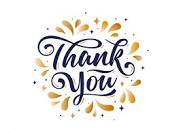